### The whole workbook takes around 15 mins to execute.

## Telecom Churn Case Study

1. Business understanding
2. Dataset understanding
3. Data Cleaning and Preparation
    - 3.a. Filtering High-Value Customers
    - 3.b. Deriving the target variable
    - 3.c. EDA
    - 3.d. Handling Class Imbalance
    - 3.e. Preparation for Modelling
4. Model Building 
    
    For Prediction 
    - a. PCA with Logistic Regression
    - b. PCA with Random Forest
    - c. PCA with XGbost

    For Variable Impact and Recommendation
    - d. Logistic Regression with RFE and VIF
5. Recommendation strategies to manage customer churn


### 1. Business understanding
#### Problem Statement
Retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will use the usage-based definition to define churn.

In this project, we have to -
- Analyze customer-level data of a leading telecom firm
- Build predictive models to :
    - identify customers at high risk of churn 
    - identify the main indicators of churn.

### 2. Dataset Understanding

In [1]:
#Importing all needed Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Importing all libraries for Models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier
from xgboost import plot_importance
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the Dataset
telecom_original = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Let's see the head of our dataset
telecom_original.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Checking for the number of entries and columns
print("Total entries in the Dataset : ", telecom_original.shape[0])
print("Total columns in the Dataset : ", telecom_original.shape[1])

Total entries in the Dataset :  99999
Total columns in the Dataset :  226


In [5]:
# identifying rows and columns having All missing values
print("Rows with all missing values : ", telecom_original.isnull().all(axis=1).sum())
print("Columns with all missing values : ",telecom_original.isnull().all(axis=0).sum())

Rows with all missing values :  0
Columns with all missing values :  0


In [6]:
# identifying rows and columns having ANY missing values
print("Rows with any missing values : ", telecom_original.isnull().any(axis=1).sum())
print("Columns with any missing values : ",telecom_original.isnull().any(axis=0).sum())

Rows with any missing values :  87631
Columns with any missing values :  166


In [7]:
#And a summary of the numeric columns
telecom_original.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [8]:
# More Info on the dataset
telecom_original.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [9]:
# Let us make a copy of the original dataset to work further
telecom = telecom_original.copy()
telecom.shape

(99999, 226)

In [10]:
# Extracting all the numeric variables
telecom_numeric = telecom.select_dtypes(include=['int64','float64'])
telecom_numeric.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [11]:
# Extracting all the categorical variables
telecom_categorical = telecom.select_dtypes(include=['object'])
telecom_categorical.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


We see we have 214 Numeric columns and 12 date columns.

### 3. Data Cleaning and Preparation

Let us correct some columns first- rename some columns for consistency.

In [12]:
# Renaming month_vbc_3g columns for consistency with other columns
# (6,7,8,9 for month instead of month name) so will be easier to work on
telecom = telecom.rename(columns={"jun_vbc_3g": "vbc_3g_6", "jul_vbc_3g": "vbc_3g_7", "aug_vbc_3g":"vbc_3g_8", "sep_vbc_3g": "vbc_3g_9"})
telecom.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00


### Let us find and work on the missing values in the dataset

In [13]:
# Defining a function to Find missing values percentage (column-wise) and filtering the columns that have missing values
def missing(limit):
    missing = (round((100*telecom.isnull().sum()/len(telecom.index)),2)).to_frame(name='Missing Percentage')
    missing = missing[missing['Missing Percentage']>limit]
    #sorting the values by highest number of missing values
    print(missing.sort_values(by=['Missing Percentage'], ascending=False))
    print("Number of Columns with greater than",limit, "Percent Values Missing :",len(missing))

In [14]:
#Columns with more than 70% values missing
missing(70)

                          Missing Percentage
date_of_last_rech_data_6               74.85
max_rech_data_6                        74.85
fb_user_6                              74.85
night_pck_user_6                       74.85
arpu_2g_6                              74.85
arpu_3g_6                              74.85
count_rech_3g_6                        74.85
count_rech_2g_6                        74.85
av_rech_amt_data_6                     74.85
total_rech_data_6                      74.85
max_rech_data_7                        74.43
date_of_last_rech_data_7               74.43
fb_user_7                              74.43
night_pck_user_7                       74.43
arpu_2g_7                              74.43
arpu_3g_7                              74.43
av_rech_amt_data_7                     74.43
total_rech_data_7                      74.43
count_rech_2g_7                        74.43
count_rech_3g_7                        74.43
arpu_3g_9                              74.08
max_rech_d

Let us go ahead and drop the ```date_of_last_rech_data``` columns because we have more than 70% values missing and imputing them will introduce too much bias. 

Also let us drop other date columns, because maybe the customer still had validity and may not have exhausted his/her benefits hence, did not need to recharge for that month, so it is not very good variable for our prediction.

In [15]:
date_cols = telecom.filter(regex ='date', axis=1).columns
telecom = telecom.drop(date_cols, axis = 1)
print("Columns dropped :" , date_cols)
print("Number of Columns Dropped : ", len(date_cols))

Columns dropped : Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')
Number of Columns Dropped :  12


In [16]:
telecom.shape

(99999, 214)

In [17]:
missing(50)

                    Missing Percentage
total_rech_data_6                74.85
count_rech_2g_6                  74.85
av_rech_amt_data_6               74.85
arpu_2g_6                        74.85
count_rech_3g_6                  74.85
night_pck_user_6                 74.85
max_rech_data_6                  74.85
fb_user_6                        74.85
arpu_3g_6                        74.85
night_pck_user_7                 74.43
max_rech_data_7                  74.43
count_rech_2g_7                  74.43
arpu_3g_7                        74.43
count_rech_3g_7                  74.43
arpu_2g_7                        74.43
fb_user_7                        74.43
av_rech_amt_data_7               74.43
total_rech_data_7                74.43
night_pck_user_9                 74.08
arpu_2g_9                        74.08
arpu_3g_9                        74.08
fb_user_9                        74.08
av_rech_amt_data_9               74.08
count_rech_3g_9                  74.08
count_rech_2g_9          

Let us look at the recharge related columns, as these columns directly impact customer usage and company revenue.

We see that we have an average recharge amount column for internet/data(```av_rech_amt_data_```), and also have the number of recharges for the same(```total_rech_data_```), so let us derive a total recharge amount column for the data. 

But as we see, we have more than 70% missing values for the total recharge columns, let us impute them first with 0, understanding that the user may not have recharged for that month(maybe customer still had validity and may not have exhausted his/her benefits)

In [18]:
# Extracting all columns related to total or average recharge counts and values
rech_cols = telecom.filter(regex='total_rech.*|av_rech.*', axis=1).columns
rech_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [19]:
# Imputing any missing values in the recharge columns with zero, implying that the user may not have recharged for that month.
telecom[rech_cols]=telecom[rech_cols].fillna(value=0)

In [20]:
#Creating 4 new Total data recharge amount columns for the respective four months
# 9th month also because we need it to tag our churn/non-churn cases later, since target variable is not directly present
telecom['Total_rech_amt_data_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['Total_rech_amt_data_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['Total_rech_amt_data_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']
telecom['Total_rech_amt_data_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

Let us also create an overall Total Recharge columns which takes into account both the normal recharge and the data recharge.

In [21]:
#Creating 4 new Total recharge amount columns for the respective four months
# 9th month also because we need it to filter high value customers later, as per our business requirement
telecom['Total_rech_amt_all_6'] = telecom['Total_rech_amt_data_6'] + telecom['total_rech_amt_6']
telecom['Total_rech_amt_all_7'] = telecom['Total_rech_amt_data_7'] + telecom['total_rech_amt_7']
telecom['Total_rech_amt_all_8'] = telecom['Total_rech_amt_data_8'] + telecom['total_rech_amt_8']
telecom['Total_rech_amt_all_9'] = telecom['Total_rech_amt_data_9'] + telecom['total_rech_amt_9']

In [22]:
telecom.shape

(99999, 222)

Dropping the variables ```av_rech_amt_data_``` , ```total_rech_data_```, ```Total_rech_amt_data_``` and ```total_rech_amt_```, because we have a new variable ```Total_rech_amt_all_``` to represent all these, so these are redundant now. 

In [23]:
# Dropping the old recharge amount variables
rech_cols = telecom.filter(regex='av_rech_amt_data_|total_rech_data_|Total_rech_amt_data_|total_rech_amt_', axis = 1).columns
telecom = telecom.drop(rech_cols, axis = 1)
print("Columns dropped :" , rech_cols)
print("Number of Columns Dropped : ", len(rech_cols))

Columns dropped : Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'Total_rech_amt_data_6', 'Total_rech_amt_data_7',
       'Total_rech_amt_data_8', 'Total_rech_amt_data_9'],
      dtype='object')
Number of Columns Dropped :  16


In [24]:
telecom.shape

(99999, 206)

In [25]:
missing(50)

                  Missing Percentage
max_rech_data_6                74.85
arpu_2g_6                      74.85
fb_user_6                      74.85
count_rech_2g_6                74.85
count_rech_3g_6                74.85
night_pck_user_6               74.85
arpu_3g_6                      74.85
fb_user_7                      74.43
count_rech_2g_7                74.43
night_pck_user_7               74.43
count_rech_3g_7                74.43
arpu_3g_7                      74.43
max_rech_data_7                74.43
arpu_2g_7                      74.43
night_pck_user_9               74.08
arpu_2g_9                      74.08
fb_user_9                      74.08
arpu_3g_9                      74.08
count_rech_3g_9                74.08
count_rech_2g_9                74.08
max_rech_data_9                74.08
arpu_2g_8                      73.66
count_rech_3g_8                73.66
night_pck_user_8               73.66
count_rech_2g_8                73.66
max_rech_data_8                73.66
f

Let us first check the columns ```night_pck_user_*``` and ```fb_user_*.``` From the data dictionary, it seems these are categorical.

In [26]:
print(telecom['night_pck_user_6'].value_counts())
print(telecom['fb_user_6'].value_counts())

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64


Cleary these values 0 and 1 represent whether the user used the service or not (in those months for which we have the data) and hence are categorical in nature. Let us create only one column for the all the months for both these variables. 

Assigning -
- 'Yes' if the user has used night pack or fb at least once in any of the first 3 months(good phase and action phase)
- 'No' if the user has not used the pack in any of these months ( sum is 0 for all 3 months )
- 'Invalid' for missing values, because we do not know for certain with only 3 months if the user had previously used the service or not, so this represents unknown cases

In [27]:
# Not considering the churn phase because that leaks data from the future
telecom['Night_pck_user'] = telecom['night_pck_user_6'] + telecom['night_pck_user_7']+ telecom['night_pck_user_8']
telecom['Night_pck_user'] = telecom.Night_pck_user.apply(lambda x : 'Yes' if x > 0 else 'No' if x==0 else 'Invalid')

telecom['Fb_user'] = telecom['fb_user_6'] + telecom['fb_user_7']+ telecom['fb_user_8']
telecom['Fb_user'] = telecom.Fb_user.apply(lambda x : 'Yes' if x > 0 else 'No' if x==0 else 'Invalid')

In [28]:
# Checking missing values if any
print("Missing percentage in Night_pck_user columns :" ,100*telecom['Night_pck_user'].isnull().sum()/len(telecom))
print("Missing percentage in Fb_user columns :" , 100*telecom['Fb_user'].isnull().sum()/len(telecom))

# Dropping the old columns
categ_cols = telecom.filter(regex='night_pck_user_|fb_user_').columns
telecom = telecom.drop(categ_cols, axis = 1)
print("Dropping the old columns", categ_cols)

Missing percentage in Night_pck_user columns : 0.0
Missing percentage in Fb_user columns : 0.0
Dropping the old columns Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')


Creating dummy variables for these new categorical columns : ```Night_pck_user``` and ```Fb_user```, for input to our models.

In [29]:
# subset of all categorical variables
telecom_categorical = telecom.select_dtypes(include=['object'])
telecom_categorical.head()

,Night_pck_user,Fb_user
0,No,Yes
1,Invalid,Invalid
2,Invalid,Invalid
3,Invalid,Invalid
4,Invalid,Invalid


In [30]:
# converting into dummies
telecom_categorical = telecom.select_dtypes(include=['object'])
telecom_dummies = pd.get_dummies(telecom_categorical, drop_first=True)
telecom_dummies.head()

,Night_pck_user_No,Night_pck_user_Yes,Fb_user_No,Fb_user_Yes
0,1,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [31]:
# dropping old categorical variables 
telecom = telecom.drop(telecom_categorical.columns, axis=1)
# concat dummy variables with X
telecom = pd.concat([telecom, telecom_dummies], axis=1)

In [32]:
telecom.shape

(99999, 202)

In [33]:
missing(50)

                 Missing Percentage
max_rech_data_6               74.85
arpu_3g_6                     74.85
arpu_2g_6                     74.85
count_rech_2g_6               74.85
count_rech_3g_6               74.85
arpu_2g_7                     74.43
count_rech_2g_7               74.43
arpu_3g_7                     74.43
count_rech_3g_7               74.43
max_rech_data_7               74.43
arpu_3g_9                     74.08
arpu_2g_9                     74.08
count_rech_3g_9               74.08
count_rech_2g_9               74.08
max_rech_data_9               74.08
arpu_3g_8                     73.66
count_rech_2g_8               73.66
max_rech_data_8               73.66
arpu_2g_8                     73.66
count_rech_3g_8               73.66
Number of Columns with greater than 50 Percent Values Missing : 20


We see the internet/data related columns are split in 2g and 3g for each month. Let us combine these columns and find total values for each month.

In [34]:
# Creating new column for arpu(2g+3g)
telecom['Total_arpu_data_6'] = telecom['arpu_2g_6'] + telecom['arpu_3g_6']
telecom['Total_arpu_data_7'] = telecom['arpu_2g_7'] + telecom['arpu_3g_7']
telecom['Total_arpu_data_8'] = telecom['arpu_2g_8'] + telecom['arpu_3g_8']

# Creating new columns for monthly(2g+3g) packs
telecom['Total_monthly_data_6'] = telecom['monthly_2g_6'] + telecom['monthly_3g_6']
telecom['Total_monthly_data_7'] = telecom['monthly_2g_7'] + telecom['monthly_3g_7']
telecom['Total_monthly_data_8'] = telecom['monthly_2g_8'] + telecom['monthly_3g_8']

# Creating new columns for sachet(2g+3g) packs
telecom['Total_sachet_data_6'] = telecom['sachet_2g_6'] + telecom['sachet_3g_6']
telecom['Total_sachet_data_7'] = telecom['sachet_2g_7'] + telecom['sachet_3g_7']
telecom['Total_sachet_data_8'] = telecom['sachet_2g_8'] + telecom['sachet_3g_8']

# Creating new column for vol(2g+3g) usage (Also for month 9 because we need that to tag our churn cases yet)
telecom['Total_vol_data_6'] = telecom['vol_2g_mb_6'] + telecom['vol_3g_mb_6']
telecom['Total_vol_data_7'] = telecom['vol_2g_mb_7'] + telecom['vol_3g_mb_7']
telecom['Total_vol_data_8'] = telecom['vol_2g_mb_8'] + telecom['vol_3g_mb_8']
telecom['Total_vol_data_9'] = telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']


In [35]:
missing(50)

                   Missing Percentage
max_rech_data_6                 74.85
Total_arpu_data_6               74.85
count_rech_2g_6                 74.85
count_rech_3g_6                 74.85
arpu_2g_6                       74.85
arpu_3g_6                       74.85
Total_arpu_data_7               74.43
count_rech_2g_7                 74.43
arpu_2g_7                       74.43
count_rech_3g_7                 74.43
max_rech_data_7                 74.43
arpu_3g_7                       74.43
arpu_3g_9                       74.08
arpu_2g_9                       74.08
count_rech_3g_9                 74.08
count_rech_2g_9                 74.08
max_rech_data_9                 74.08
arpu_3g_8                       73.66
count_rech_3g_8                 73.66
arpu_2g_8                       73.66
count_rech_2g_8                 73.66
max_rech_data_8                 73.66
Total_arpu_data_8               73.66
Number of Columns with greater than 50 Percent Values Missing : 23


We see even after combining the ```arpu_data_``` columns we still have more than 70% data missing in the ```Total_arpu_data_``` columns and since arpu is also dependent on external factors(like total number of users, costs etc., which are unknown to us) we will drop them instead of imputing them.

- Dropping all old arpu_2g and 3g Columns along with Total_arpu_data_ because we still have more than 70% data missing
- Also dropping the count_rech_2g_ and count_rech_3g_ columns because we already have a total column for it- total_rech_data_ and are hence redundant
- Dropping all max recharges data columns because even those have a lot of missing values.

In [36]:
# Extracting and dropping columns related to arpu_2g,3g or count data recharge or max data recharge
data_rech_cols = telecom.filter(regex='arpu_.g.*|count_rech_.g.*|max_rech_data|vol_.g|monthly_.g|sachet_.g|Total_arpu_data_', axis=1).columns
telecom = telecom.drop(columns=data_rech_cols)
print("Columns Dropped : ",data_rech_cols)
print("Number of Columns Dropped : ",len(data_rech_cols))

Columns Dropped :  Index(['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'Total_arpu_data_6', 'Total_arpu_data_7',
       'Total_arpu_data_8'],
      dtype='object')
Number of Columns Dropped :  47


In [37]:
missing(50)

Empty DataFrame
Columns: [Missing Percentage]
Index: []
Number of Columns with greater than 50 Percent Values Missing : 0


So, now we don't have columns with more than 50 percent missing values. Let us check for any other missing values.

In [38]:
missing(0)

                  Missing Percentage
ic_others_9                     7.75
std_og_t2m_mou_9                7.75
loc_og_t2m_mou_9                7.75
std_ic_t2f_mou_9                7.75
loc_og_t2f_mou_9                7.75
loc_og_t2c_mou_9                7.75
og_others_9                     7.75
loc_og_mou_9                    7.75
std_ic_t2t_mou_9                7.75
std_og_t2t_mou_9                7.75
loc_ic_mou_9                    7.75
loc_og_t2t_mou_9                7.75
std_og_t2f_mou_9                7.75
loc_ic_t2f_mou_9                7.75
std_og_t2c_mou_9                7.75
std_og_mou_9                    7.75
loc_ic_t2m_mou_9                7.75
isd_og_mou_9                    7.75
loc_ic_t2t_mou_9                7.75
spl_og_mou_9                    7.75
std_ic_t2o_mou_9                7.75
std_ic_t2m_mou_9                7.75
spl_ic_mou_9                    7.75
isd_ic_mou_9                    7.75
roam_ic_mou_9                   7.75
std_ic_mou_9                    7.75
r

We still have a lot of columns with missing values but the missing percentage per column is very small.

In [39]:
telecom.shape

(99999, 168)

### Check columns which do not have variance in the data, and hence, are not providing us with any meaningful insights.

In [40]:
# Removing columns that have only single unique value because they are not adding any meaning to the data
single = telecom.loc[:,telecom.apply(pd.Series.nunique) == 1].columns
print("Removing columns:",single)
telecom = telecom.drop(single, axis=1)
print("Number of Columns Dropped : ", len(single))

Removing columns: Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')
Number of Columns Dropped :  12


In [41]:
telecom.shape

(99999, 156)

In [42]:
missing(0)

                  Missing Percentage
ic_others_9                     7.75
std_ic_t2m_mou_9                7.75
loc_ic_t2t_mou_9                7.75
loc_og_t2f_mou_9                7.75
loc_ic_t2m_mou_9                7.75
spl_og_mou_9                    7.75
loc_og_t2m_mou_9                7.75
loc_ic_t2f_mou_9                7.75
std_og_t2m_mou_9                7.75
loc_ic_mou_9                    7.75
loc_og_t2t_mou_9                7.75
std_ic_t2t_mou_9                7.75
loc_og_mou_9                    7.75
og_others_9                     7.75
roam_og_mou_9                   7.75
isd_og_mou_9                    7.75
std_ic_t2f_mou_9                7.75
roam_ic_mou_9                   7.75
std_og_mou_9                    7.75
std_ic_mou_9                    7.75
offnet_mou_9                    7.75
spl_ic_mou_9                    7.75
std_og_t2t_mou_9                7.75
isd_ic_mou_9                    7.75
onnet_mou_9                     7.75
std_og_t2f_mou_9                7.75
l

We see some missing columns have been reduced.

#### Let us filter high value customers and tag the churn/ non-churn cases as per our Business Requirement.

### 3.a. Filter high-value customers

As mentioned in the problem statement, we need to predict churn only for the high-value customers. 

Defining high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

We may reduce some missing values in the process.

In [43]:
# since we need the total Recharge amount in the good phase, we take the mean recharge amount of the first two months only
# Creating a new column to represent the same
telecom['Average_rech_amt_good'] = (telecom['Total_rech_amt_all_6'] + telecom['Total_rech_amt_all_7'])/2

In [44]:
# Find the 70th Percentile of column 'Average_rech_amt_good'
X = telecom.Average_rech_amt_good.quantile(.7)
print(X)
telecom.Average_rech_amt_good.describe(percentiles =[.10,.25,.50,.70,.75,.99])

478.0


count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
10%         60.000000
25%        128.000000
50%        275.000000
70%        478.000000
75%        553.000000
99%       3363.510000
max      61236.000000
Name: Average_rech_amt_good, dtype: float64

In [45]:
# So we filter out values which have an average recharge amount less than our X
telecom = telecom[telecom['Average_rech_amt_good'] >= X]
print(len(telecom))

30001


In [46]:
missing(0)

                  Missing Percentage
ic_others_9                     6.34
std_ic_t2m_mou_9                6.34
loc_ic_t2t_mou_9                6.34
loc_og_t2f_mou_9                6.34
loc_ic_t2m_mou_9                6.34
spl_og_mou_9                    6.34
loc_og_t2m_mou_9                6.34
loc_ic_t2f_mou_9                6.34
std_og_t2m_mou_9                6.34
loc_ic_mou_9                    6.34
loc_og_t2t_mou_9                6.34
std_ic_t2t_mou_9                6.34
loc_og_mou_9                    6.34
og_others_9                     6.34
roam_og_mou_9                   6.34
isd_og_mou_9                    6.34
std_ic_t2f_mou_9                6.34
roam_ic_mou_9                   6.34
std_og_mou_9                    6.34
std_ic_mou_9                    6.34
offnet_mou_9                    6.34
spl_ic_mou_9                    6.34
std_og_t2t_mou_9                6.34
isd_ic_mou_9                    6.34
onnet_mou_9                     6.34
std_og_t2f_mou_9                6.34
l

We have a reduced missing percentage per column after filtering high-value customer but let us clean our dataset further to remove the remaining missing values. 

There are a lot of missing values in columns for month 9, we don't need them for prediction so we can drop them, but before that we need them to tag Churn/Non-Churn cases.

### 3.b. Deriving our Target Variable 'Churn'

Since we need a Target variable for churn which is not directly present in out dataset, we need to derive this attribute with the churn phase variables present i.e. variables of the 9th month. Also, let us define an Total Usage for the Good Phase(first two months) and the action phase (third month).

In [47]:
# Usage for good phase and action phase
telecom['Total_usage_6'] = telecom['total_ic_mou_6']+telecom['total_og_mou_6']+ telecom['Total_vol_data_6']
telecom['Total_usage_7'] = telecom['total_ic_mou_7']+telecom['total_og_mou_7']+ telecom['Total_vol_data_7'] 
telecom['Total_usage_8'] = telecom['total_ic_mou_8']+telecom['total_og_mou_8']+ telecom['Total_vol_data_8'] 

# since we need a Target variable for churn which is not directly present in out dataset
# Creating a new column to represent the total usage in the last month or the churn phase
telecom['Total_usage_9'] = telecom['total_ic_mou_9']+telecom['total_og_mou_9']+ telecom['Total_vol_data_9']

In [48]:
# Creating a new column 'Churn' which will be target variable
#assigning it 1 if Total usage in churn phase is zero(it is a churn case) else 0(not a churn case)
telecom['Churn'] = telecom['Total_usage_9'].apply(lambda x: 1 if x==0 else 0)

In [49]:
print("Churned customers : ", telecom['Churn'].sum())

Churned customers :  2441


Now that we have tagged our Churn/Non-churn cases, let us drop the month 9 variables from our dataset because those are not needed for our prediction model.

In [50]:
# Dropping all the columns related to churn phase(month 9) since they will not be helpful to predict the churn cases
churn_cols = telecom.filter(regex='_9$', axis=1).columns
telecom = telecom.drop(churn_cols, axis=1)
print("Columns dropped ", churn_cols)
print("Number of Columns dropped :", len(churn_cols))

Columns dropped  Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vbc_3g_9',
       'Total_rech_amt_all_9', 'Total_vol_data_9', 'Total_usage_9'],
      dtype='object')
Number of Columns dropped : 37


In [51]:
missing(0)

                  Missing Percentage
ic_others_8                     3.91
loc_og_t2m_mou_8                3.91
std_og_mou_8                    3.91
spl_og_mou_8                    3.91
std_og_t2f_mou_8                3.91
og_others_8                     3.91
std_og_t2m_mou_8                3.91
loc_ic_t2t_mou_8                3.91
std_og_t2t_mou_8                3.91
loc_ic_t2m_mou_8                3.91
loc_og_mou_8                    3.91
loc_ic_t2f_mou_8                3.91
loc_og_t2c_mou_8                3.91
loc_ic_mou_8                    3.91
isd_og_mou_8                    3.91
std_ic_t2t_mou_8                3.91
loc_og_t2f_mou_8                3.91
std_ic_t2m_mou_8                3.91
spl_ic_mou_8                    3.91
onnet_mou_8                     3.91
loc_og_t2t_mou_8                3.91
std_ic_t2f_mou_8                3.91
isd_ic_mou_8                    3.91
roam_og_mou_8                   3.91
std_ic_mou_8                    3.91
offnet_mou_8                    3.91
r

We have been able to reduce the columns which contained missing values. And now we have a very small percentage of missing values in the columns mostly related to usage( incoming, outgoing etc.)

In [52]:
telecom.shape

(30001, 125)

In [53]:
#Checking for rows that have any null values
len(telecom[telecom.isnull().sum(axis=1) > 0 ].index)

1497

Since the number of rows with missing values is very small, we will drop them instead of imputing them.

In [54]:
# Retaining rows which have no null values
print("Percentage rows dropped:",100*len(telecom[telecom.isnull().sum(axis=1) >0 ].index)/len(telecom))
telecom = telecom[telecom.isnull().sum(axis=1) == 0]

Percentage rows dropped: 4.989833672210926


In [55]:
telecom.shape

(28504, 125)

In [56]:
missing(0)

Empty DataFrame
Columns: [Missing Percentage]
Index: []
Number of Columns with greater than 0 Percent Values Missing : 0


We have cleaned our dataset of all missing values, so let us now check our dataset for outliers.

### Checking and removing outliers

In [57]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom.describe(percentiles=[.01,.25,.5,.75,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,Total_sachet_data_7,Total_sachet_data_8,Total_vol_data_6,Total_vol_data_7,Total_vol_data_8,Average_rech_amt_good,Total_usage_6,Total_usage_7,Total_usage_8,Churn
count,2.850400e+04,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,...,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,7.001214e+09,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,...,1.456813,1.294731,453.291204,486.096079,454.365260,1153.967952,1370.333973,1441.479117,1324.441629,0.055992
std,6.877760e+05,448.960314,480.075654,500.754116,458.723036,482.671988,464.022072,479.249454,502.604354,485.648594,...,3.111483,3.019653,898.130752,934.255393,934.814671,1364.087653,1116.179060,1153.227149,1200.197744,0.229911
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000027e+09,22.563410,38.657330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,482.500000,0.000000,1.605400,0.000000,0.000000
25%,7.000623e+09,317.360500,322.602500,254.759000,20.140000,19.530000,14.840000,80.732500,80.352500,60.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,604.000000,700.397500,749.135000,593.600000,0.000000
50%,7.001218e+09,485.169000,488.899500,442.791000,89.985000,89.910000,74.085000,231.550000,231.825000,199.875000,...,0.000000,0.000000,19.280000,56.820000,0.000000,801.500000,1123.465000,1172.960000,1062.730000,0.000000
75%,7.001807e+09,698.914000,704.999500,672.453250,298.760000,304.895000,257.415000,494.372500,506.467500,457.432500,...,2.000000,1.000000,621.770000,668.067500,621.485000,1208.500000,1741.192500,1818.267500,1719.872500,0.000000
99%,7.002385e+09,1955.145730,1999.462350,1989.922110,2146.076400,2220.474500,2175.252400,2301.026700,2434.539600,2219.376900,...,13.000000,13.000000,3790.410200,4117.990700,3986.579700,6084.265000,5243.825400,5573.041200,5542.128700,1.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,54.000000,60.000000,26850.560000,28395.420000,29653.150000,61236.000000,26862.910000,28775.020000,29663.390000,1.000000


In [58]:
# As we see all the numeric data have outliers
# So, Extracting all the numeric variables
telecom_numeric = telecom.select_dtypes(include=['int64','float64'])
telecom_numeric.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,Total_sachet_data_7,Total_sachet_data_8,Total_vol_data_6,Total_vol_data_7,Total_vol_data_8,Average_rech_amt_good,Total_usage_6,Total_usage_7,Total_usage_8,Churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0.00,0.00,0.00,1185.0,1113.99,1167.28,778.90,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,1,3,0.00,1106.95,11.97,696.0,612.22,1567.10,200.07,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0.00,0.00,0.00,640.0,1067.43,1160.68,1329.58,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,0,1,0.00,599.57,1009.93,583.0,253.96,962.50,1547.74,0
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,3,0,3596.95,8212.41,7708.98,14786.5,3604.84,8219.60,7751.33,0


In [59]:
# Dropping mobile number and Churn column as outlier treatment is not required for these columns
telecom_numeric = telecom_numeric.drop(['mobile_number','Churn'],axis=1)
telecom_numeric.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,Total_sachet_data_6,Total_sachet_data_7,Total_sachet_data_8,Total_vol_data_6,Total_vol_data_7,Total_vol_data_8,Average_rech_amt_good,Total_usage_6,Total_usage_7,Total_usage_8
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0.00,0.00,0.00,1185.0,1113.99,1167.28,778.90
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,1,3,0.00,1106.95,11.97,696.0,612.22,1567.10,200.07
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0.00,0.00,0.00,640.0,1067.43,1160.68,1329.58
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0,0,1,0.00,599.57,1009.93,583.0,253.96,962.50,1547.74
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,3,0,3596.95,8212.41,7708.98,14786.5,3604.84,8219.60,7751.33


In [60]:
# Applying IQR score to remove outliers and keeping the value from range of 1%-99%
Q1 = telecom_numeric.quantile(0.01)
Q3 = telecom_numeric.quantile(0.99)
IQR = Q3 - Q1

telecom_numeric = telecom_numeric[~((telecom_numeric < (Q1 - 1.5 * IQR)) | (telecom_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
telecom_numeric.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,Total_sachet_data_6,Total_sachet_data_7,Total_sachet_data_8,Total_vol_data_6,Total_vol_data_7,Total_vol_data_8,Average_rech_amt_good,Total_usage_6,Total_usage_7,Total_usage_8
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0.0,0.00,0.00,1185.0,1113.99,1167.28,778.90
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,1,3,0.0,1106.95,11.97,696.0,612.22,1567.10,200.07
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0.0,0.00,0.00,640.0,1067.43,1160.68,1329.58
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0,0,1,0.0,599.57,1009.93,583.0,253.96,962.50,1547.74
38,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.00,...,0,0,0,0.0,0.00,0.00,528.0,408.65,738.48,813.83


In [61]:
telecom_numeric.shape

(26286, 119)

In [62]:
# Dropping the columns which has outliers from the dataframe
telecom = telecom.drop(telecom_numeric.columns,axis=1)
telecom.head()

,mobile_number,Night_pck_user_No,Night_pck_user_Yes,Fb_user_No,Fb_user_Yes,Churn
7,7000701601,0,0,0,0,1
8,7001524846,0,0,0,0,0
21,7002124215,0,0,0,0,0
23,7000887461,0,0,0,0,0
33,7000149764,0,1,0,1,0


In [63]:
# Concatenating all the columns back after outier treatment
telecom = pd.concat([telecom,telecom_numeric],axis=1,join='inner')
telecom.head(10)

,mobile_number,Night_pck_user_No,Night_pck_user_Yes,Fb_user_No,Fb_user_Yes,Churn,arpu_6,arpu_7,arpu_8,onnet_mou_6,...,Total_sachet_data_6,Total_sachet_data_7,Total_sachet_data_8,Total_vol_data_6,Total_vol_data_7,Total_vol_data_8,Average_rech_amt_good,Total_usage_6,Total_usage_7,Total_usage_8
7,7000701601,0,0,0,0,1,1069.180,1349.850,3171.480,57.84,...,0,0,0,0.00,0.00,0.00,1185.0,1113.99,1167.28,778.90
8,7001524846,0,0,0,0,0,378.721,492.223,137.362,413.69,...,0,1,3,0.00,1106.95,11.97,696.0,612.22,1567.10,200.07
21,7002124215,0,0,0,0,0,514.453,597.753,637.760,102.41,...,0,0,0,0.00,0.00,0.00,640.0,1067.43,1160.68,1329.58
23,7000887461,0,0,0,0,0,74.350,193.897,366.966,48.96,...,0,0,1,0.00,599.57,1009.93,583.0,253.96,962.50,1547.74
38,7000815202,0,0,0,0,0,363.987,486.558,393.909,248.99,...,0,0,0,0.00,0.00,0.00,528.0,408.65,738.48,813.83
41,7000721289,0,0,0,0,0,482.832,425.764,229.769,86.39,...,0,0,0,0.00,0.00,0.00,503.0,597.07,875.90,424.08
48,7000294396,0,0,0,0,0,1873.271,575.927,179.218,2061.69,...,0,0,0,0.00,0.00,0.00,1448.5,4402.99,1657.09,396.23
56,7002180748,1,0,0,1,0,452.624,320.548,368.807,34.46,...,0,12,16,2046.80,739.81,829.75,2562.0,2401.47,1012.89,1130.29
57,7001682585,1,0,0,1,0,1201.298,687.704,602.052,61.23,...,2,0,0,3239.06,5495.89,4815.12,4096.5,3833.06,6165.23,5479.74
61,7000152517,1,0,0,1,0,565.516,390.307,430.911,178.41,...,1,0,0,360.65,587.47,156.24,829.0,1644.80,1729.96,1501.21


Re-Checking and removing any columns which do not have variance in the data anymore because we have removed outliers, that may have caused some columns to be reduced to single values.

In [64]:
# Removing columns that have only single unique value because they are not adding any meaning to the data
single = telecom.loc[:,telecom.apply(pd.Series.nunique) == 1].columns
print("Removing columns:",single)
telecom = telecom.drop(single, axis=1)
print("Number of Columns Dropped : ", len(single))

Removing columns: Index(['og_others_7', 'og_others_8'], dtype='object')
Number of Columns Dropped :  2


In [65]:
telecom.shape

(26286, 123)

In [66]:
missing(0)

Empty DataFrame
Columns: [Missing Percentage]
Index: []
Number of Columns with greater than 0 Percent Values Missing : 0


### 3.c. EDA

Now that we have cleaned our dataset and also removed outliers, let us explore and understand the data further and the relationship among the columns.

### Churners vs Non-churners

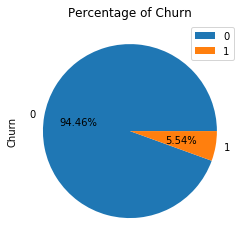

In [67]:
# Plotting the percentage of churn and non-churn cases
telecom.groupby('Churn')['Churn'].count().plot.pie(rot=0, autopct='%.2f%%', title = 'Percentage of Churn')
plt.legend()
# 0 are non-Churn and 1 are the Churn Cases

We see from the data we have only **5.54% of cases which are churn**. This is hence, a highly imbalanced dataset. 

### Correlation Among Variables

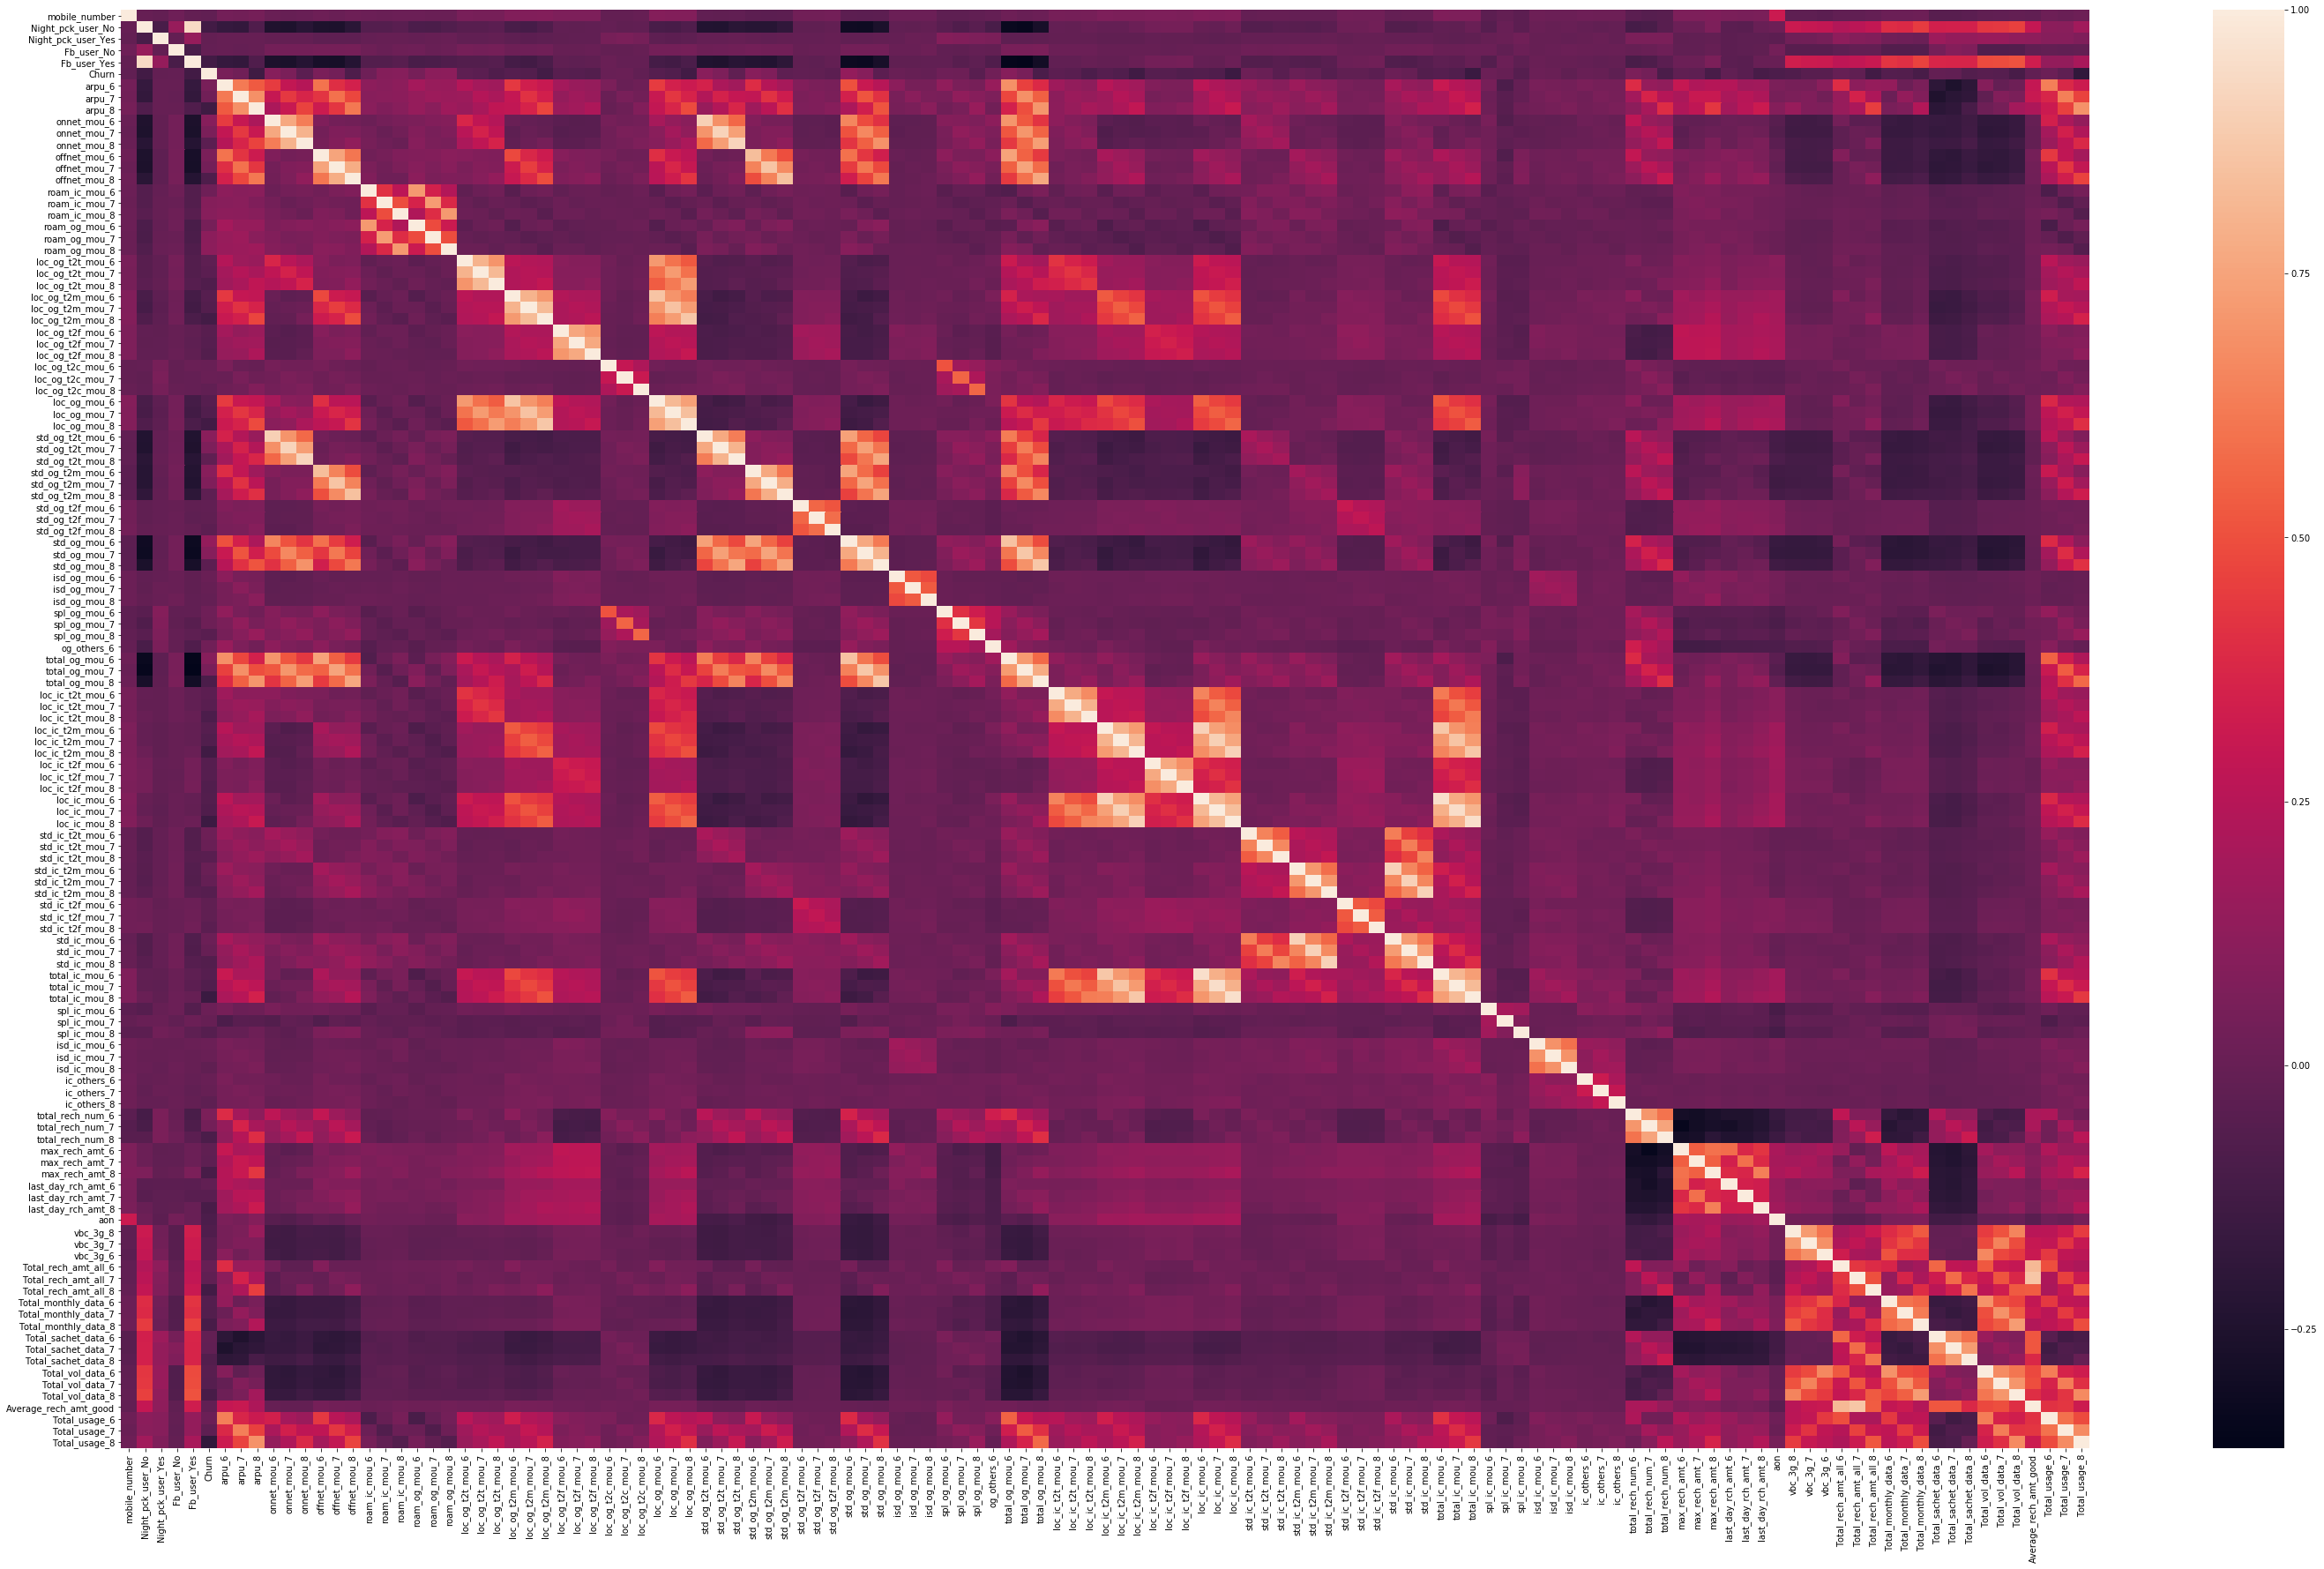

In [68]:
# correlation matrix
telecom_corr = telecom.corr()
# plotting correlations on a heatmap
plt.figure(figsize=(50,30))
sns.heatmap(telecom_corr)
plt.show()

From the heatmap, we infer there are many variables which have high correlation, both positive and negative, so we will have to take care of the multicollinearity.

### Trend across Categorical Variables
Let us see if the categorical variables ```Night_pck_user``` and ```Fb_user``` have any effect on the Churn.

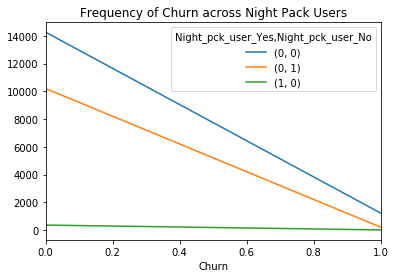

In [69]:
# Trend across Night Pack Users
pd.pivot_table(telecom, values='mobile_number', index=['Churn'], columns=['Night_pck_user_Yes','Night_pck_user_No'], 
               aggfunc = 'count').plot(title='Frequency of Churn across Night Pack Users')

From the above plot, we can see that Users that do not use Night Packs are less likely to churn. However, there is no specific trend detected across users that use a night pack (Also, the number of night pack users is very small). So, this variable may impact Churn.

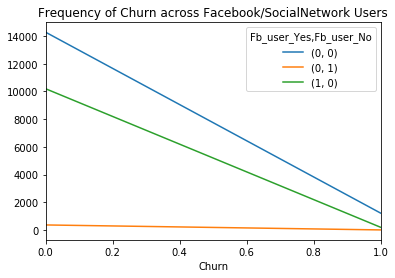

In [70]:
# Trend across Facebook/SocialNetworking sites Users
pd.pivot_table(telecom, values='mobile_number', index=['Churn'], columns=['Fb_user_Yes','Fb_user_No'], 
               aggfunc = 'count').plot(title='Frequency of Churn across Facebook/SocialNetwork Users')

From the above plot, we can see that Users that use Facebook/SocialNetworking Sites are less likely to churn. However, there is no specific trend across users that do not use Social networking sites(Also, the number of peopele who do not use Fb/SN is very small). So, this variable may impact Churn.

### Trend across numeric variables

Text(0.5, 1.0, 'Age on Network')

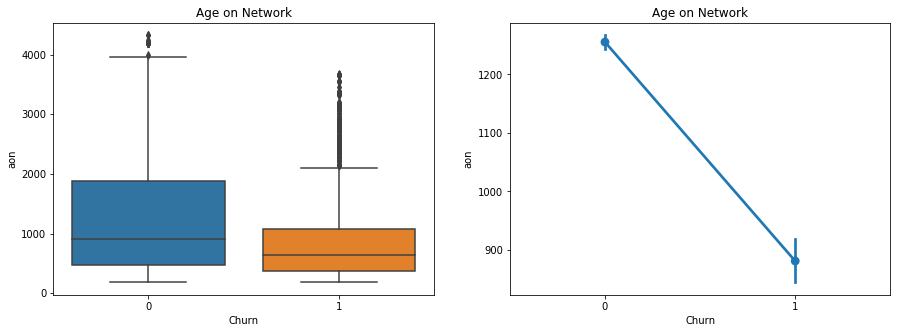

In [71]:
# Let us check how the "aon" column varies across churn status, which represents the "Age on Network" for the user
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='aon', data=telecom)
plt.title("Age on Network")
plt.subplot(1, 2, 2)
sns.pointplot(x='Churn', y='aon', data=telecom)
plt.title("Age on Network")

There definitely seems to be some impact of the ```aon``` on the churn, old users churn less.

In [72]:
# Extracting all month related numeric columns
telecom_mou = telecom.filter(regex='6|7|8', axis = 1).columns
telecom_mou

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'Total_monthly_data_8', 'Total_sachet_data_6', 'Total_sachet_data_7',
       'Total_sachet_data_8', 'Total_vol_data_6', 'Total_vol_data_7',
       'Total_vol_data_8', 'Total_usage_6', 'Total_usage_7', 'Total_usage_8'],
      dtype='object', length=115)

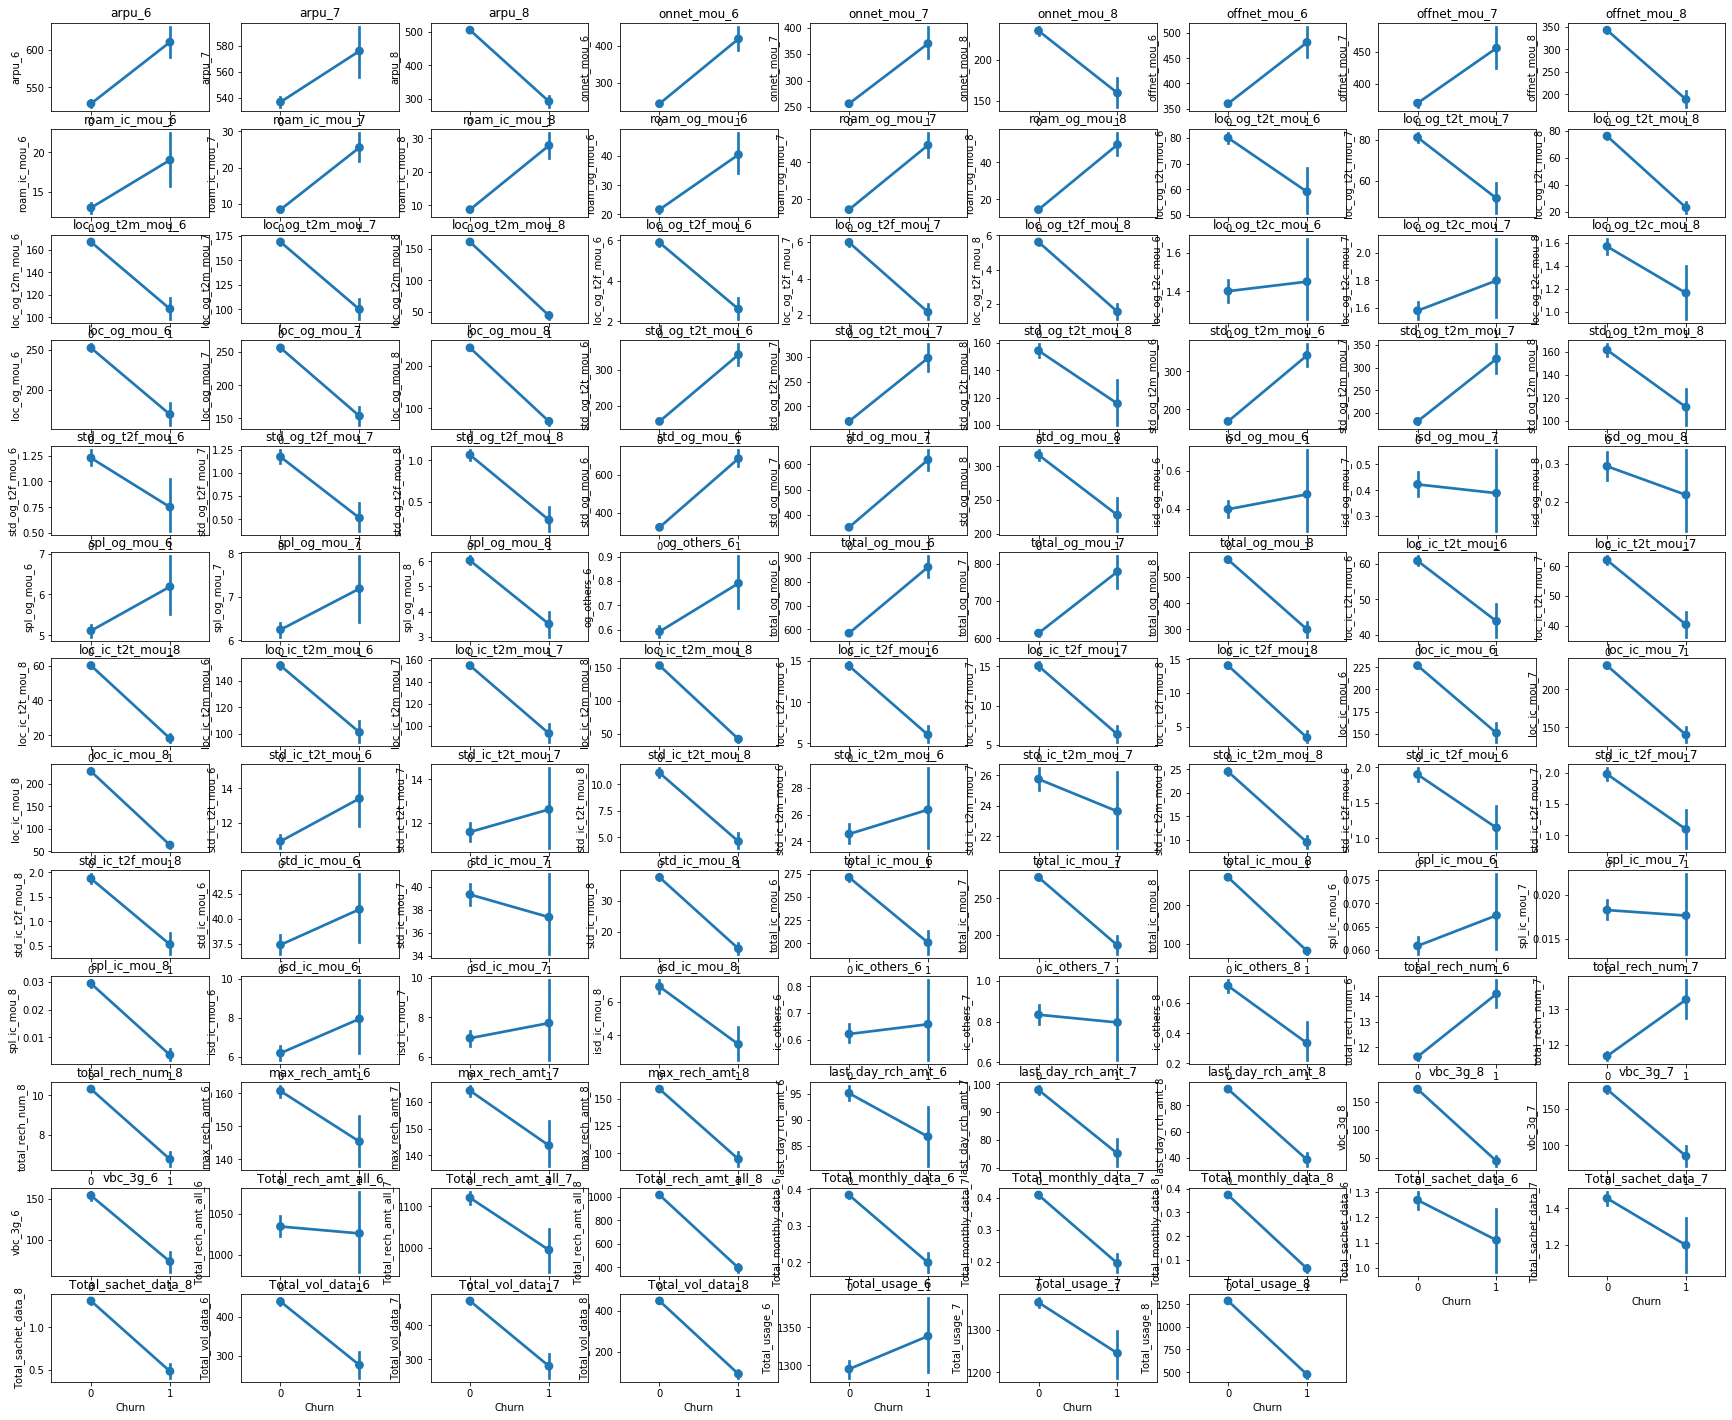

In [73]:
# This code snippet takes more than 1 min
# Plotting plots of all month numeric variables across Churn status

plt.figure(figsize=(30, 25))
        
for col in range(0,len(telecom_mou)):
    plt.subplot(13,9,col+1)
    sns.pointplot(x='Churn', y=telecom_mou[col],data=telecom)
    plt.title(telecom_mou[col])
    
plt.show()

From the plots, we see there is definitely some postive(eg. arpu_) and negative (eg. total_ic_mou_) trend of the numeric variables across churn status. 

Note how there are some variables, eg. arpu_, total_og_mou_ for which the trend inverts in month 8 (action phase) when compared to the good phase( month 6 and 7).

### 3.d. Handling Class Imbalance

We have seen earlier that the data we have is highly imbalanced. The Non-churn cases are way more than the Churn cases.
We must remove this imbalance because many classification learning algorithms have low predictive accuracy for the infrequent class and hence, the models built using this imbalanced data will not be very effective. 

In [74]:
# Separate majority and minority classes
telecom_nochurn = telecom[telecom['Churn']== 0]
telecom_churn   = telecom[telecom['Churn']== 1]

In [75]:
print("NotChurn class:",telecom_nochurn.shape)
print("Churn class:",telecom_churn.shape)

NotChurn class: (24829, 123)
Churn class: (1457, 123)


We are using the upsampling technique to balance our classes. We will upsample our minority 'Churn' Class.

In [76]:
# Upsampling minority 'Churn' class using resample function
telecom_churn_upsampled = resample(telecom_churn, 
                                 replace=True,      # sample with replacement
                                 n_samples=24829,   # to match majority class
                                 random_state=50)   # for reproducible results
 
# Combining majority 'Non-Churn' class with upsampled minority class
telecom_upsampled = pd.concat([telecom_nochurn, telecom_churn_upsampled])
 
# Display new class counts
telecom_upsampled.Churn.value_counts()

1    24829
0    24829
Name: Churn, dtype: int64

In [77]:
telecom_upsampled.shape

(49658, 123)

### 3.e. Preparation for Modelling

Now that we have a balanced class data and we have already created dummy variables for the categorical variables, let us prepare our data further for model building.

In [78]:
# Putting feature variable to X
X = telecom_upsampled.drop(['Churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_upsampled['Churn']

y.head()

8     0
21    0
23    0
38    0
41    0
Name: Churn, dtype: int64

In [79]:
# Extracting numeric columns
num_cols = X.select_dtypes(include=['int64','float64']).columns

# Scaling of the values of independent numeric variables
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X.head()

,Night_pck_user_No,Night_pck_user_Yes,Fb_user_No,Fb_user_Yes,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,Total_sachet_data_6,Total_sachet_data_7,Total_sachet_data_8,Total_vol_data_6,Total_vol_data_7,Total_vol_data_8,Average_rech_amt_good,Total_usage_6,Total_usage_7,Total_usage_8
8,0,0,0,0,-0.525730,-0.186508,-0.727775,0.158873,0.075882,-0.418745,...,-0.456552,-0.113998,0.904081,-0.508634,0.987045,-0.406974,-0.402050,-0.742684,0.258401,-0.718056
21,0,0,0,0,-0.153251,0.110044,0.670510,-0.447486,-0.364734,-0.288982,...,-0.456552,-0.465848,-0.386335,-0.508634,-0.505366,-0.425779,-0.466238,-0.264640,-0.147540,0.473480
23,0,0,0,0,-1.360993,-1.024840,-0.086182,-0.551604,-0.528667,-0.422633,...,-0.456552,-0.465848,0.043804,-0.508634,0.302986,1.160844,-0.531572,-1.118916,-0.345486,0.703620
38,0,0,0,0,-0.566164,-0.202427,-0.010894,-0.161955,0.617152,1.217682,...,-0.456552,-0.465848,-0.386335,-0.508634,-0.505366,-0.425779,-0.594613,-0.956466,-0.569242,-0.070592
41,0,0,0,0,-0.240026,-0.373266,-0.469558,-0.478692,-0.391362,-0.301165,...,-0.456552,-0.465848,-0.386335,-0.508634,-0.505366,-0.425779,-0.623269,-0.758594,-0.431984,-0.481745


In [80]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### 4. Model Building

Now that we prepared our data, we will build the below models now.

**For Prediction-**
- a. PCA with Logistic Regression
- b. PCA with Random Forest
- c. PCA with XGbost

**For Variable Impact and Recommendation-**
- d. Logistic Regression with RFE and VIF

### Dimensionality Reduction using PCA
Since we have 100+ variables left in our dataset, we will try dimensionality reduction using PCA, also handling multicollinearity in the process.

In [81]:
# PCA which captures all variance in the data
# random_state for reproducible results
pca = PCA(random_state=40)

# Applying PCA to the Train set
df_train_pca = pca.fit_transform(X_train)
df_train_pca.shape

(34760, 121)

In [82]:
# Transforming test set
df_test_pca = pca.transform(X_test)
df_test_pca.shape

(14898, 121)

In [83]:
print("PCA Components :\n", pca.components_)
print("\nVariance explained by each Principal component: \n",pca.explained_variance_ratio_.round(3)*100)
print("\nAll components greater than zero : ", (pca.explained_variance_ratio_.round(3)*100>0).sum())

PCA Components :
 [[ 8.77894413e-03  4.37009881e-05  8.26598027e-04 ...  1.15671554e-01
   1.42899793e-01  1.66732337e-01]
 [-5.47159088e-02 -1.10223266e-03  1.46489473e-03 ...  7.61364813e-02
   9.16950498e-02  2.49757512e-02]
 [ 6.89107827e-02  7.02628601e-03 -1.76563196e-03 ...  1.20864980e-01
   1.83731879e-01  1.97581062e-01]
 ...
 [-0.00000000e+00  3.45371130e-16 -2.23387899e-16 ...  6.34963102e-01
  -1.09723634e-01 -1.04415641e-01]
 [-0.00000000e+00 -1.42797489e-15  1.38222734e-15 ... -8.80516917e-02
  -3.45846985e-01  4.59826707e-01]
 [-0.00000000e+00 -9.39164657e-16 -1.25597085e-15 ... -1.17986478e-01
   3.07723148e-01 -2.68627483e-01]]

Variance explained by each Principal component: 
 [12.6  9.4  5.9  4.7  4.1  4.   3.7  3.1  2.6  2.3  2.2  2.1  1.9  1.9
  1.7  1.6  1.4  1.3  1.2  1.2  1.2  1.1  1.   1.   0.9  0.9  0.9  0.9
  0.8  0.8  0.8  0.8  0.8  0.7  0.7  0.7  0.7  0.7  0.6  0.6  0.6  0.6
  0.6  0.6  0.5  0.5  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4  0.4  0.4
  0.4  0.3 

From the above, we see that 100% variance in the data is expalined by 90 of the Principal Components (all the other components have been reduced to 0 by PCA). Let us confirm our findings with a Scree plot.

In [84]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

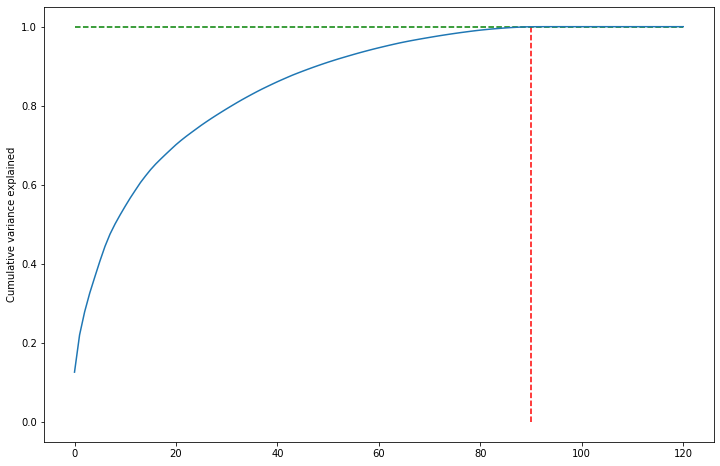

In [85]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=90, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=1, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

The Scree plot above confirms our findings. Let us now use PCA to transform our data with the 90 components selected by PCA.

In [86]:
#  PCA which explains all the variance with 90 components
pca_final = PCA(n_components=90)
# Transformimg the data with PCA
df_train_pca = pca_final.fit_transform(X_train)
df_test_pca = pca_final.transform(X_test)

In [87]:
df_train_pca.shape

(34760, 90)

In [88]:
df_test_pca.shape

(14898, 90)

So, we have now transformed our data using PCA which has 90 Principal components to explain all variance in data. Let's go ahead and create a Logistic Regression model with the transformed data.

### 4.a PCA with Logistic Regression

In [89]:
# Building a basic Logistic Regression Model with the PCA transformed train data
LR_pca = LogisticRegression()

# Fit the transformed data
model_pca = LR_pca.fit(df_train_pca, y_train)

In [90]:
# Prediction Probability of the basic LR+PCA model
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
print("ROC_AUC score of the Basic PCA with LR model : {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

ROC_AUC score of the Basic PCA with LR model : 0.88


We have a good ROC_AUC score.

Let us now get the best set of hyperparametes for our LR model using k-fold Cross-validation. We choose the scoring method as ```Recall```, because we want a higher ``Recall`` value(because we want to correctly identify all the churn cases).

In [91]:
# Set of parameters we want to try for our Model
# 3-fold CV
folds = 3
parameters = { 'C' : [0.0001,0.0005,0.001,0.005,0.01, 0.05, 0.1]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = LR_pca, param_grid = parameters , 
                           scoring = 'recall', 
                           cv = folds , n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(df_train_pca , y_train)

#getting the best parameters
print( "Best Recall Score : ",grid_search.best_score_)
print("Best Hyperparamter Values :", grid_search.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:   11.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   12.5s finished


Best Recall Score :  0.8241789688368655
Best Hyperparamter Values : {'C': 0.001}


Building model with the best hyperparameters we have got.

In [92]:
# Using the best available hyperparameter for the Logistic Regression model
learner_pca = LogisticRegression(**grid_search.best_params_)
# Fitting the model
model_pca = learner_pca.fit(df_train_pca, y_train)

In [93]:
# Prediction using the model
y_pred_lr = model_pca.predict(df_test_pca)
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

# Evaluation Metrics
print("Performance of the Tuned PCA with Logistic Regression model")
print("------------------------------------------------------------")
print("ROC_AUC score of the model : {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
print("Accuracy :{:2.3}".format(metrics.accuracy_score(y_test, y_pred_lr)))
print("Precision : {:2.3}".format(metrics.precision_score(y_test, y_pred_lr)))
print("Recall : {:2.3}".format(metrics.recall_score(y_test, y_pred_lr)))

Performance of the Tuned PCA with Logistic Regression model
------------------------------------------------------------
ROC_AUC score of the model : 0.88
Accuracy :0.812
Precision : 0.8
Recall : 0.831


In [94]:
# Evaluate the model
print("Performance of the PCA with Logistic Regression model \n")
print(classification_report(y_test, y_pred_lr))

Performance of the PCA with Logistic Regression model 

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      7456
           1       0.80      0.83      0.82      7442

    accuracy                           0.81     14898
   macro avg       0.81      0.81      0.81     14898
weighted avg       0.81      0.81      0.81     14898



In [95]:
# Confusion matrix 
confusionlr = metrics.confusion_matrix(y_test, y_pred_lr )
print("PCA + LR Confusion Matrix :\n", confusionlr)

PCA + LR Confusion Matrix :
 [[5912 1544]
 [1261 6181]]


We have a good ROC_AUC for this model. The accuracy, precision and recall are good as all are above 80%. But it has misclassified many Churn cases.

### 4.b. PCA with Random Forest

Let us create another model now with PCA and Random Forest. 

In [96]:
# Set of parameters we want to try for our Model
# 3-fold CV
folds = 3
param_grid = {
    'max_depth': [8,12],
    'n_estimators': range(100, 600, 200), 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'recall',
                           cv = folds, n_jobs = -1,verbose = 1)

In [97]:
# This code snippet takes around 10 mins to execute
# Fit the grid search to the transformed data(already transformed with PCA)
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  6.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=40,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [98]:
# printing the optimal accuracy score and hyperparameters
print('We can get Recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get Recall of 0.9994248245829159 using {'max_depth': 12, 'max_features': 10, 'n_estimators': 100}


In [99]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True, **grid_search.best_params_)

# fit the model on data alreday transformed with PCA
rfc.fit(df_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
# predict
y_pred_rfc_proba = rfc.predict_proba(df_test_pca)
y_pred_rfc_proba[:10]
y_pred_rfc = rfc.predict(df_test_pca)

In [101]:
# Evaluation Metrics
print("Performance of the Tuned PCA with Random Forest model")
print("-----------------------------------------------------")
print("ROC_AUC score of the model : {:2.3}".format(metrics.roc_auc_score(y_test,y_pred_rfc_proba[:, 1])))
print("Accuracy :{:2.3}".format(metrics.accuracy_score(y_test, y_pred_rfc)))
print("Precision : {:2.3}".format(metrics.precision_score(y_test, y_pred_rfc)))
print("Recall : {:2.3}".format(metrics.recall_score(y_test, y_pred_rfc)))

Performance of the Tuned PCA with Random Forest model
-----------------------------------------------------
ROC_AUC score of the model : 0.996
Accuracy :0.972
Precision : 0.947
Recall : 1.0


In [102]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      7456
           1       0.95      1.00      0.97      7442

    accuracy                           0.97     14898
   macro avg       0.97      0.97      0.97     14898
weighted avg       0.97      0.97      0.97     14898



In [103]:
print(confusion_matrix(y_test,y_pred_rfc))

[[7037  419]
 [   0 7442]]


For the PCA with Random Forest, we have got a far better ROC_AUC score compared to our previous model. Also it was able to identify all churn cases.

### 4.c. PCA with XGBoost

Let's create another model for prediction - PCA with XGBoost.

In [104]:
# Create and fit model with training data(already transformed with PCA)
xgb = XGBClassifier()
model_xgb = xgb.fit(df_train_pca, y_train)

In [105]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_proba = model_xgb.predict_proba(df_test_pca)[:,1]
y_pred_proba

array([0.9932861 , 0.00234146, 0.9753677 , ..., 0.02984274, 0.11400599,
       0.84649813], dtype=float32)

In [106]:
# Prediction Probability of the basic XGBoost+PCA model
print("ROC_AUC score of the Basic PCA with XGBoost model : {:2.3}".format(metrics.roc_auc_score(y_test, y_pred_proba)))

ROC_AUC score of the Basic PCA with XGBoost model : 0.999


In [107]:
# This code snippet takes around 1.5 min
# hyperparameter tuning with XGBoost

# creating a KFold object of 3 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2,0.3],
             'subsample': [0.3,0.6,0.9],
             'max_depth' : [2]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1, n_jobs=-1,
                        return_train_score=True)      
# fit the model
model_cv.fit(df_train_pca, y_train) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [108]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [109]:
# convert parameters to float for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,23.971905,0.182945,0.143283,0.003761,0.2,2,0.3,"{'learning_rate': 0.2, 'max_depth': 2, 'subsam...",0.843858,0.848516,0.839172,0.843849,0.003815,6,0.854887,0.857821,0.853002,0.855237,0.001983
1,30.746540,0.327978,0.132998,0.003798,0.2,2,0.6,"{'learning_rate': 0.2, 'max_depth': 2, 'subsam...",0.848861,0.847654,0.846247,0.847587,0.001068,4,0.856095,0.857303,0.856539,0.856646,0.000499
2,32.563073,1.336746,0.137964,0.009080,0.2,2,0.9,"{'learning_rate': 0.2, 'max_depth': 2, 'subsam...",0.850414,0.845756,0.842105,0.846092,0.003400,5,0.856613,0.850574,0.854124,0.853770,0.002478
3,20.908606,0.090087,0.141621,0.001410,0.3,2,0.3,"{'learning_rate': 0.3, 'max_depth': 2, 'subsam...",0.869048,0.861629,0.861950,0.864209,0.003424,3,0.882322,0.876456,0.878364,0.879048,0.002443
4,27.183322,0.271032,0.121870,0.015807,0.3,2,0.6,"{'learning_rate': 0.3, 'max_depth': 2, 'subsam...",0.865079,0.879055,0.864021,0.869385,0.006851,2,0.874472,0.885428,0.876639,0.878846,0.004738
5,24.716756,2.831828,0.075479,0.005287,0.3,2,0.9,"{'learning_rate': 0.3, 'max_depth': 2, 'subsam...",0.874224,0.869393,0.869543,0.871053,0.002243,1,0.881201,0.877405,0.883368,0.880658,0.002464


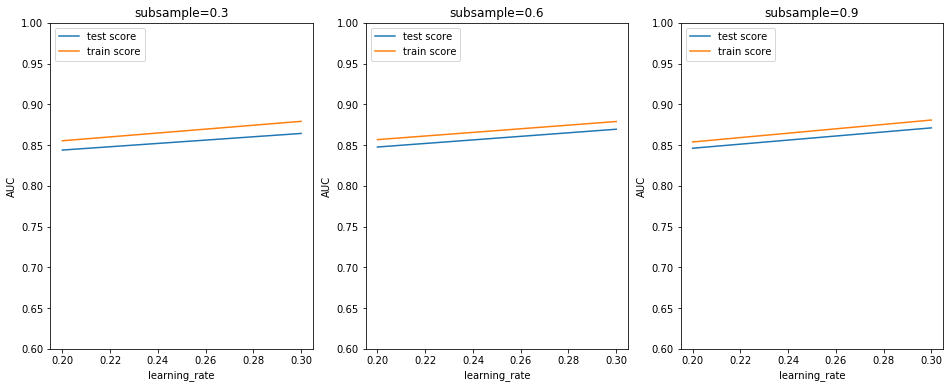

In [110]:
# plotting the parameters
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
     # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')


The results show that a subsample size of 0.3 and learning_rate of about 0.9 seems optimal.

In [111]:
#getting the best parameter`s
print(model_cv.best_score_)
print(model_cv.best_params_)

0.8710530422246145
{'learning_rate': 0.3, 'max_depth': 2, 'subsample': 0.9}


Let's build a final model with the chosen hyperparameters.

In [112]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.3,
          'max_depth': 2,
          'subsample': 0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_model_final = XGBClassifier(params = params)
xgb_model_final.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic',
              params={'learning_rate': 0.3, 'max_depth': 2,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [113]:
# predict
y_pred_xgb_proba = xgb_model_final.predict_proba(df_test_pca)
y_pred_xgb_proba[:10]
y_pred_xgb = xgb_model_final.predict(df_test_pca)

In [114]:
# Evaluation Metrics
print("Performance of the Tuned PCA with XGBoost model")
print("-----------------------------------------------------")
print("ROC_AUC score of the model : {:2.3}".format(metrics.roc_auc_score(y_test, y_pred_xgb_proba[:, 1])))
print("Accuracy :{:2.3}".format(metrics.accuracy_score(y_test, y_pred_xgb)))
print("Precision : {:2.3}".format(metrics.precision_score(y_test, y_pred_xgb)))
print("Recall : {:2.3}".format(metrics.recall_score(y_test, y_pred_xgb)))

Performance of the Tuned PCA with XGBoost model
-----------------------------------------------------
ROC_AUC score of the model : 0.999
Accuracy :0.982
Precision : 0.966
Recall : 1.0


In [115]:
# Evaluate the model
print("Performance of the PCA with XGBoost model \n")
print(classification_report(y_test, y_pred_xgb))

Performance of the PCA with XGBoost model 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7456
           1       0.97      1.00      0.98      7442

    accuracy                           0.98     14898
   macro avg       0.98      0.98      0.98     14898
weighted avg       0.98      0.98      0.98     14898



In [116]:
# Confusion matrix 
confusionxgb = metrics.confusion_matrix(y_test, y_pred_xgb )
print("XGBoost Confusion Matrix :\n", confusionxgb)

XGBoost Confusion Matrix :
 [[7191  265]
 [   0 7442]]


XGBoost has resulted in the highest ROC_AUC obtained, has the highest accuracy as compared to the previous models.
Also, it has identified all churn cases correctly.

### Model Selection

In [117]:
# Evaluation of all the Prediction models

print("Performance of Model 1 : PCA with Logistic Regression\n")
print(classification_report(y_test, y_pred_lr))
print("------------------------------------------------------------")
print("Performance of Model 2 : PCA with Random Forest")
print(classification_report(y_test, y_pred_rfc))
print("------------------------------------------------------------")
print("Performance of Model 3 : PCA with XGBoost\n")
print(classification_report(y_test, y_pred_xgb))

Performance of Model 1 : PCA with Logistic Regression

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      7456
           1       0.80      0.83      0.82      7442

    accuracy                           0.81     14898
   macro avg       0.81      0.81      0.81     14898
weighted avg       0.81      0.81      0.81     14898

------------------------------------------------------------
Performance of Model 2 : PCA with Random Forest
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      7456
           1       0.95      1.00      0.97      7442

    accuracy                           0.97     14898
   macro avg       0.97      0.97      0.97     14898
weighted avg       0.97      0.97      0.97     14898

------------------------------------------------------------
Performance of Model 3 : PCA with XGBoost

              precision    recall  f1-score   support

           0       1.00

From the three models we built using PCA, XGBoost was not only able to identify all churn cases, it also has the highest Accuracy, Recall, Precision and F1-score. 
**For Prediction, Model 3 : PCA with XGBoost is the best model.**

Now that we have built and selected the best model for prediction, we also need to identify important predictor attributes which help the business understand indicators of churn.

Since, we can not interpret this from the PCA transformed data, we will build a new model to identify the important attributes.
This model will be build with Logistic Regression but since we have a lot of variables, we will do a manual + RFE reduction of the features space then follow the p-value and VIF approach to reduce multicollinearity.

### 4.d. Logistic Regression with manual + RFE and VIF

From the data dictionary, we understand that the columns with 't2f_', 't2m_' etc. are too much detail. Sum of these columns is equal to the loc_ and std_ columns (respectively as per prefix). 

Further, sum of the loc_ columns along with std_,spl_,isd_,oth_ columns is equal to the total_og_mou_ and total_ic_mou_ columns. Which clearly means that these columns are redundant and hence are highly collinear.

In [118]:
# Extracting all the incoming and outgoing call related columns
dup_call_cols = telecom.filter(regex='loc_*|std_*|spl_*|isd_*|_oth_*|total_ic.*|total_og.*', axis=1).columns

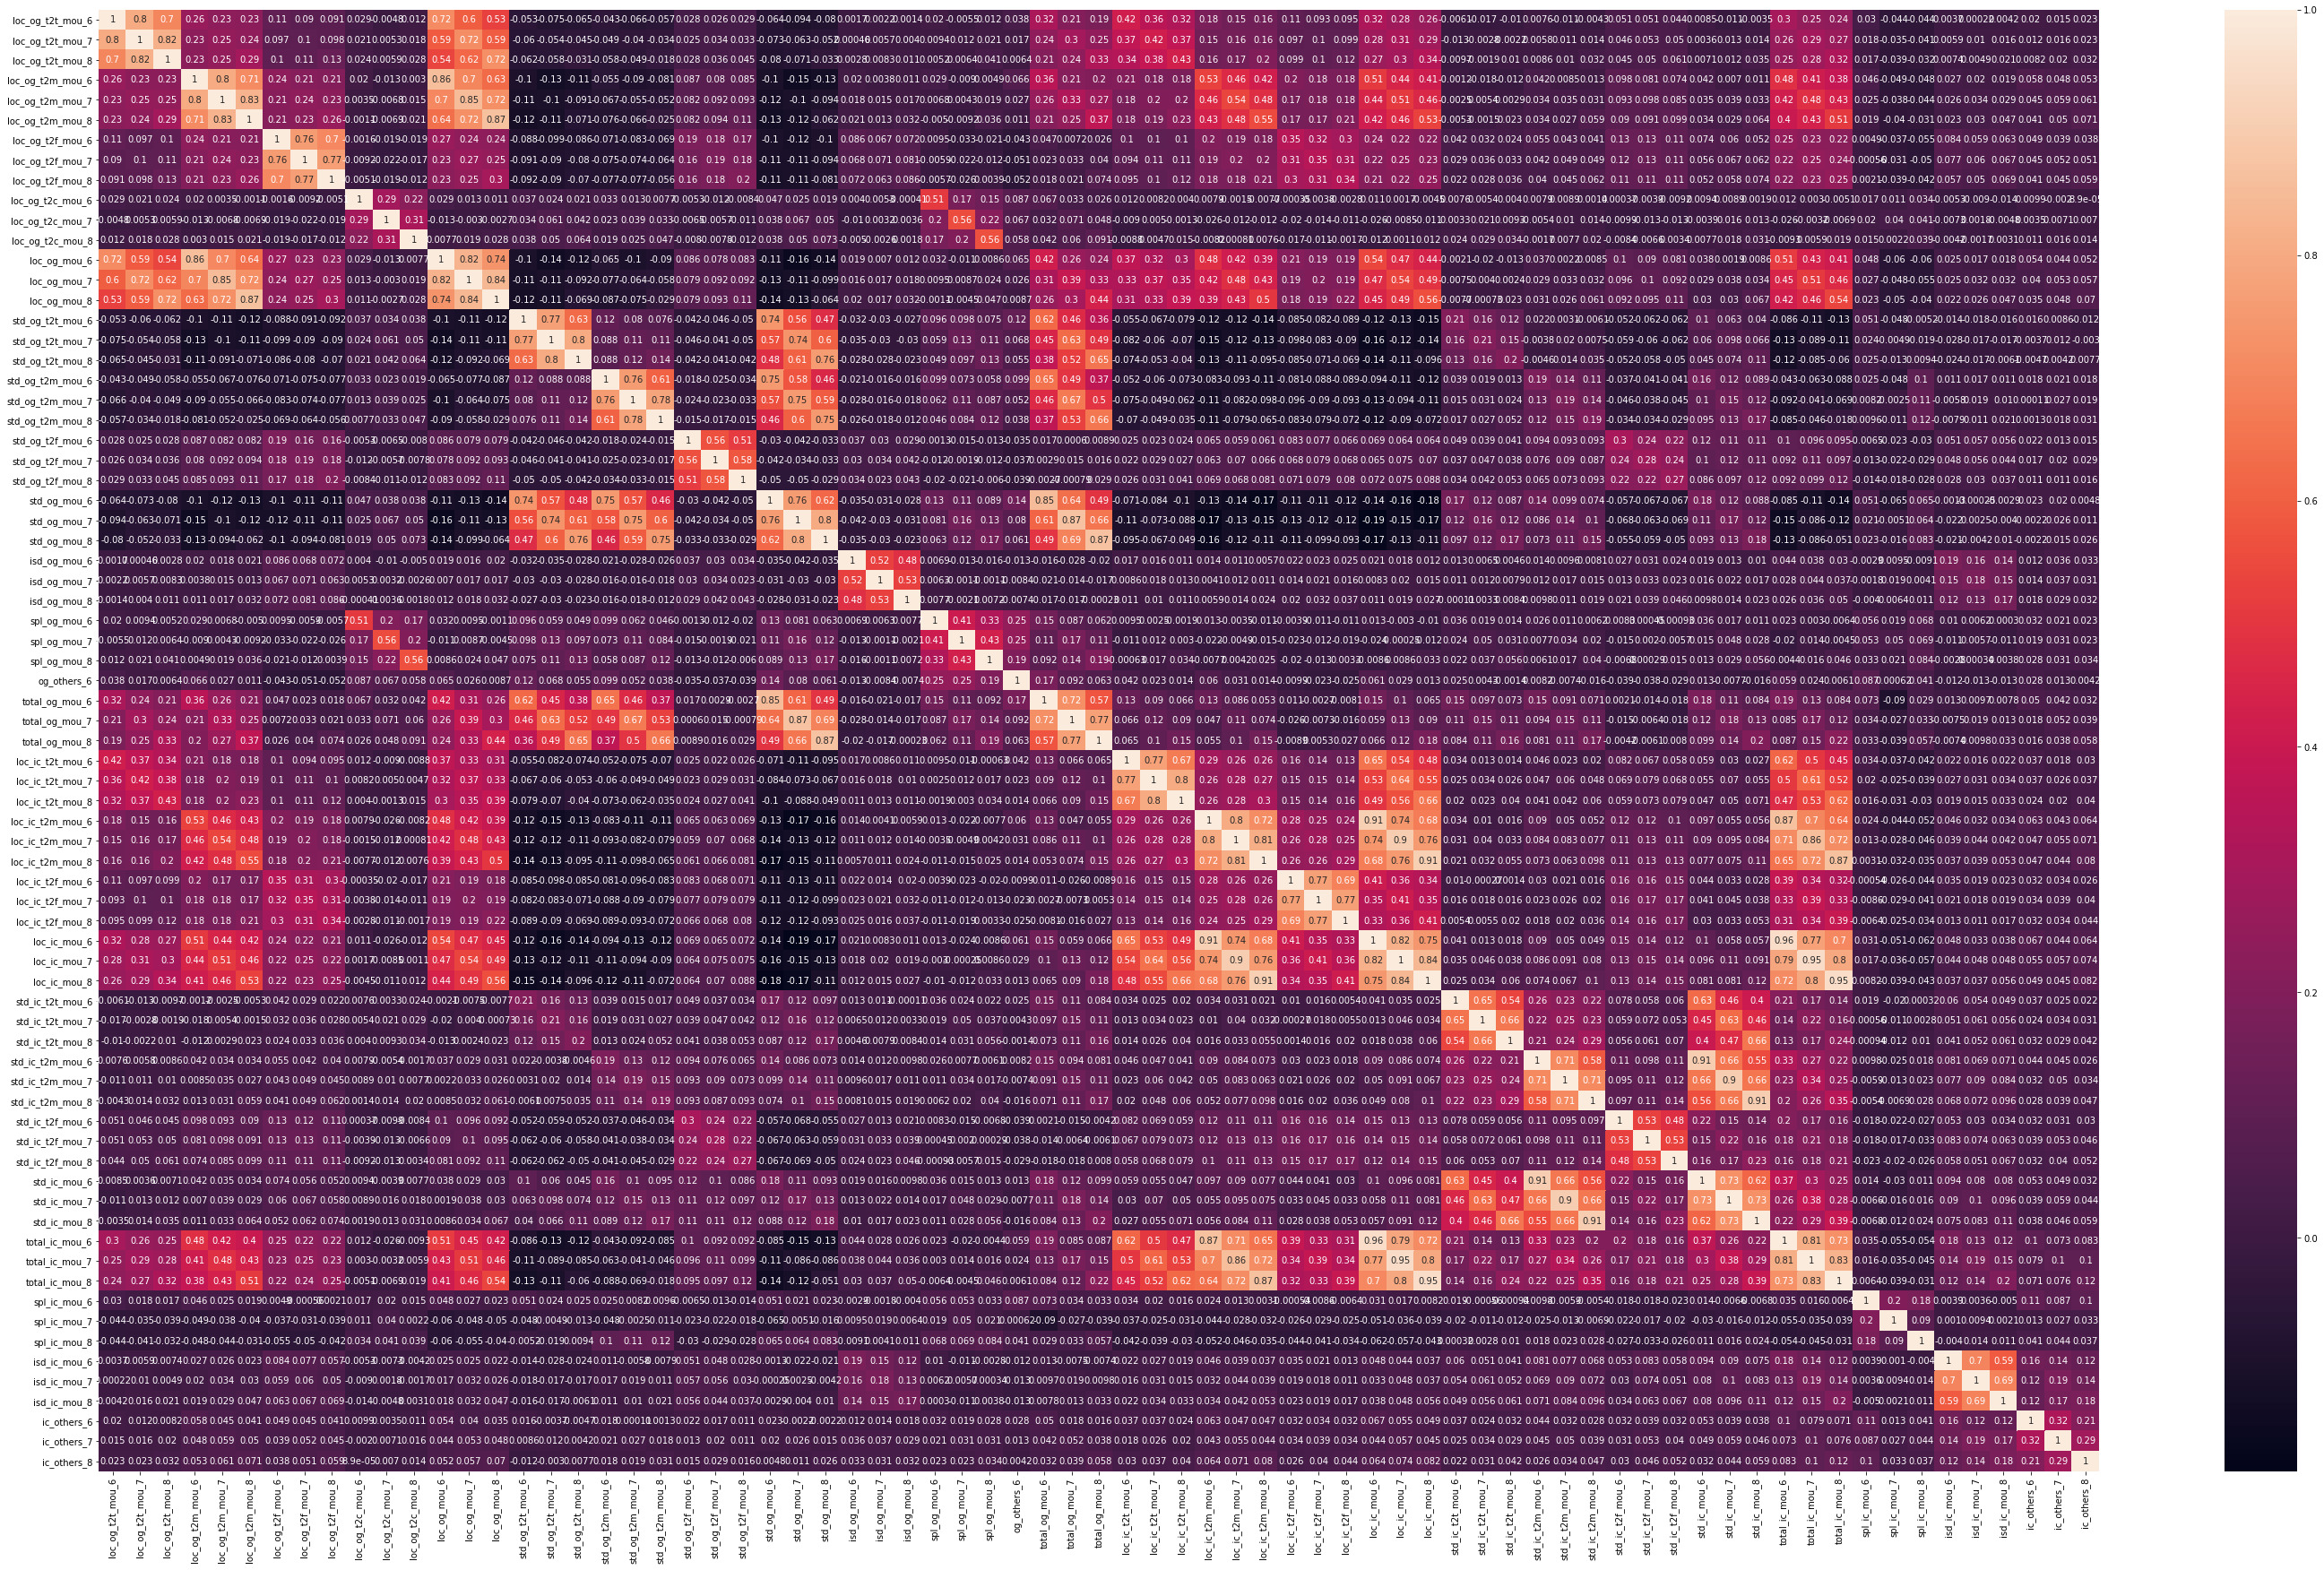

In [119]:
# heatmap to check the correlations

plt.figure(figsize=(50,30))
sns.heatmap(telecom[dup_call_cols].corr(), annot=True)
plt.show()

The heatmap confirms what we have understood. For e.g. loc_ic_mou_6 has correlation of 0.96 with the column total_ic_mou_6.

So, let us drop the t2, loc, std, isd, spl, oth columns since we already have the sum of all these columns in the total column.

In [120]:
# Extracting all the incoming and outgoing call related columns (except the total columns)
dup_call_cols = X_train.filter(regex='loc_*|std_*|spl_*|isd_*|_oth_*', axis=1).columns

# and dropping them as these are redundant to total columns
X_train = X_train.drop(dup_call_cols, axis = 1)
print("Columns dropped :" , dup_call_cols)
print("Number of Columns Dropped : ", len(dup_call_cols))

Columns dropped : Index(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       's

In [121]:
X_train.shape

(34760, 54)

### Building the Logistic Regression model with RFE.

In [122]:
# Logistic Regression Model
logreg = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(logreg, 20) 

#Fit the model
rfe = rfe.fit(X_train, y_train)

print("RFE assigned Ranking :")
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

RFE assigned Ranking :


[('Night_pck_user_No', True, 1),
 ('Night_pck_user_Yes', False, 34),
 ('Fb_user_No', False, 10),
 ('Fb_user_Yes', False, 9),
 ('arpu_6', False, 27),
 ('arpu_7', False, 35),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 15),
 ('onnet_mou_8', False, 26),
 ('offnet_mou_6', False, 7),
 ('offnet_mou_7', False, 16),
 ('offnet_mou_8', False, 8),
 ('roam_ic_mou_6', False, 5),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 30),
 ('roam_og_mou_6', False, 4),
 ('roam_og_mou_7', False, 12),
 ('roam_og_mou_8', True, 1),
 ('total_og_mou_6', False, 19),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', True, 1),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_6', False, 21),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_6', False, 2),
 ('max_rech_amt_7', False, 18),
 ('max_rech_amt_8', False, 11),
 ('last_day_rch_amt_6', False, 22),
 ('last_day_rch_amt_7', False, 3),
 ('las

In [123]:
# Columns not chosen by RFE
X_train.columns[~rfe.support_]

Index(['Night_pck_user_Yes', 'Fb_user_No', 'Fb_user_Yes', 'arpu_6', 'arpu_7',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'total_og_mou_6', 'total_rech_num_6', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'vbc_3g_7', 'vbc_3g_6', 'Total_rech_amt_all_7',
       'Total_rech_amt_all_8', 'Total_monthly_data_6', 'Total_monthly_data_7',
       'Total_sachet_data_6', 'Total_sachet_data_7', 'Total_vol_data_6',
       'Total_vol_data_7', 'Total_vol_data_8', 'Average_rech_amt_good',
       'Total_usage_6'],
      dtype='object')

In [124]:
# Columns chosen by RFE
col = X_train.columns[rfe.support_]
col

Index(['Night_pck_user_No', 'arpu_8', 'onnet_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'aon', 'vbc_3g_8',
       'Total_rech_amt_all_6', 'Total_monthly_data_8', 'Total_sachet_data_8',
       'Total_usage_7', 'Total_usage_8'],
      dtype='object')

Let us now build model with the columns selected by RFE and check p-value and VIF to arrive at our final model.

#### Assessing the model with StatsModels

In [125]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                34760
Model:                            GLM   Df Residuals:                    34739
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15954.
Date:                Mon, 18 May 2020   Deviance:                       31908.
Time:                        20:38:44   Pearson chi2:                 7.40e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0297      0.020      1.504      0.133      -0.009       0.068
Night_pck_user_No       -0.3859      0.043     -8.944      0.000      -0.471      -0.301
arpu_8                   0.2745      0.033      8.428      0.000       0.211       0.338
onnet_mou_6              0.1543      0.018      8.599      0.000       0.119       0.189
roam_ic_mou_7            0.2536      0.021     12.084      0.000       0.213       0.295
roam_og_mou_8            0.1946      0.022      8.937      0.000       0.152       0.237
total_og_mou_7           0.2305      0.034      6.721      0.000       0.163       0.298
total_og_mou_8          -0.4040      0.046     -8.729      0.000      -0.495      -0.313
total_ic_mou_6           0.3081      0.027     11.246      0.000       0.254       0.362
total_ic_mou_7           0.2053      0.035      5.856      0.000       0.137       0.274
total_ic_mou_8          -1.2518      0.041    -30.330      0.000      -1.333      -1.171
total_rech_num_7         0.3959      0.026     15.041      0.000       0.344       0.448
total_rech_num_8        -0.5635      0.028    -20.108      0.000      -0.618      -0.509
last_day_rch_amt_8      -0.3311      0.018    -18.338      0.000      -0.366      -0.296
aon                     -0.2442      0.015    -16.268      0.000      -0.274      -0.215
vbc_3g_8                -0.1099      0.023     -4.745      0.000      -0.155      -0.064
Total_rech_amt_all_6     0.1469      0.016      9.159      0.000       0.115       0.178
Total_monthly_data_8    -0.4572      0.030    -15.042      0.000      -0.517      -0.398
Total_sachet_data_8     -0.2540      0.021    -12.024      0.000      -0.295      -0.213
Total_usage_7            0.3657      0.028     12.891      0.000       0.310       0.421
Total_usage_8           -0.4769      0.051     -9.323      0.000      -0.577      -0.377
========================================================================================
"""

All p-values are zero, so let's evaluate the model.

In [126]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.95621508, 0.8011735 , 0.31845149, 0.00182546, 0.19010744,
       0.9428802 , 0.89244647, 0.98765479, 0.62207531, 0.99130464])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [127]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.956215,63754
1,1,0.801174,17376
2,0,0.318451,95239
3,0,0.001825,30484
4,0,0.190107,42640


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [128]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.956215,63754,1
1,1,0.801174,17376,1
2,0,0.318451,95239,0
3,0,0.001825,30484,0
4,0,0.190107,42640,0


In [129]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[13870  3503]
 [ 3335 14052]]


In [130]:
# Let's check the overall accuracy.
print("Accuracy of the model : ", metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

Accuracy of the model :  0.8032796317606444


### Checking VIFs

In [131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Total_usage_8,8.81
6,total_og_mou_8,7.43
1,arpu_8,4.44
5,total_og_mou_7,4.15
8,total_ic_mou_7,4.08
9,total_ic_mou_8,3.66
18,Total_usage_7,3.41
11,total_rech_num_8,3.13
16,Total_monthly_data_8,2.99
7,total_ic_mou_6,2.76


In [132]:
# Let's drop Total_usage_8 since it has a high VIF
col = col.drop('Total_usage_8', 1)
col

Index(['Night_pck_user_No', 'arpu_8', 'onnet_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'aon', 'vbc_3g_8',
       'Total_rech_amt_all_6', 'Total_monthly_data_8', 'Total_sachet_data_8',
       'Total_usage_7'],
      dtype='object')

In [133]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                34760
Model:                            GLM   Df Residuals:                    34740
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16002.
Date:                Mon, 18 May 2020   Deviance:                       32003.
Time:                        20:38:46   Pearson chi2:                 6.92e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0345      0.020      1.762      0.078      -0.004       0.073
Night_pck_user_No       -0.3919      0.043     -9.152      0.000      -0.476      -0.308
arpu_8                   0.2574      0.032      7.974      0.000       0.194       0.321
onnet_mou_6              0.1513      0.018      8.444      0.000       0.116       0.186
roam_ic_mou_7            0.2513      0.021     12.028      0.000       0.210       0.292
roam_og_mou_8            0.1976      0.022      9.088      0.000       0.155       0.240
total_og_mou_7           0.3108      0.033      9.466      0.000       0.246       0.375
total_og_mou_8          -0.6887      0.035    -19.954      0.000      -0.756      -0.621
total_ic_mou_6           0.3109      0.027     11.340      0.000       0.257       0.365
total_ic_mou_7           0.2471      0.035      7.108      0.000       0.179       0.315
total_ic_mou_8          -1.3763      0.039    -35.220      0.000      -1.453      -1.300
total_rech_num_7         0.4017      0.026     15.286      0.000       0.350       0.453
total_rech_num_8        -0.5743      0.028    -20.525      0.000      -0.629      -0.519
last_day_rch_amt_8      -0.3300      0.018    -18.349      0.000      -0.365      -0.295
aon                     -0.2443      0.015    -16.294      0.000      -0.274      -0.215
vbc_3g_8                -0.1635      0.021     -7.630      0.000      -0.206      -0.122
Total_rech_amt_all_6     0.1402      0.016      8.870      0.000       0.109       0.171
Total_monthly_data_8    -0.6149      0.026    -23.785      0.000      -0.666      -0.564
Total_sachet_data_8     -0.3140      0.020    -15.407      0.000      -0.354      -0.274
Total_usage_7            0.2525      0.025     10.233      0.000       0.204       0.301
========================================================================================
"""

All p-values are zero so let's check the accuracy of this model.

In [134]:
# Predict the probablities
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8026179516685846


So overall the accuracy hasn't dropped much.
#### Let's check the VIFs again

In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_8,4.41
6,total_og_mou_8,4.39
8,total_ic_mou_7,4.02
5,total_og_mou_7,3.94
11,total_rech_num_8,3.13
9,total_ic_mou_8,3.11
18,Total_usage_7,2.97
7,total_ic_mou_6,2.76
10,total_rech_num_7,2.40
16,Total_monthly_data_8,2.05


In [136]:
# Let's drop arpu_8 since it has a high VIF
col = col.drop('arpu_8', 1)
col

Index(['Night_pck_user_No', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'aon', 'vbc_3g_8', 'Total_rech_amt_all_6',
       'Total_monthly_data_8', 'Total_sachet_data_8', 'Total_usage_7'],
      dtype='object')

In [137]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                34760
Model:                            GLM   Df Residuals:                    34741
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16033.
Date:                Mon, 18 May 2020   Deviance:                       32066.
Time:                        20:38:47   Pearson chi2:                 6.51e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0445      0.020      2.278      0.023       0.006       0.083
Night_pck_user_No       -0.4096      0.043     -9.579      0.000      -0.493      -0.326
onnet_mou_6              0.1357      0.018      7.626      0.000       0.101       0.171
roam_ic_mou_7            0.2485      0.021     11.936      0.000       0.208       0.289
roam_og_mou_8            0.2650      0.020     13.147      0.000       0.226       0.305
total_og_mou_7           0.3000      0.033      9.153      0.000       0.236       0.364
total_og_mou_8          -0.5341      0.028    -18.781      0.000      -0.590      -0.478
total_ic_mou_6           0.3074      0.027     11.209      0.000       0.254       0.361
total_ic_mou_7           0.2453      0.035      7.073      0.000       0.177       0.313
total_ic_mou_8          -1.3140      0.038    -34.669      0.000      -1.388      -1.240
total_rech_num_7         0.3875      0.026     14.807      0.000       0.336       0.439
total_rech_num_8        -0.5175      0.027    -19.225      0.000      -0.570      -0.465
last_day_rch_amt_8      -0.2889      0.017    -16.691      0.000      -0.323      -0.255
aon                     -0.2357      0.015    -15.771      0.000      -0.265      -0.206
vbc_3g_8                -0.1489      0.021     -6.999      0.000      -0.191      -0.107
Total_rech_amt_all_6     0.1526      0.016      9.679      0.000       0.122       0.184
Total_monthly_data_8    -0.5667      0.025    -22.532      0.000      -0.616      -0.517
Total_sachet_data_8     -0.3143      0.020    -15.411      0.000      -0.354      -0.274
Total_usage_7            0.2572      0.025     10.383      0.000       0.209       0.306
========================================================================================
"""

All p-values are zero. So let's check the accuracy of this model.

In [138]:
# Predict the probablities
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8016973532796318


So overall the accuracy hasn't dropped much.
#### Let's check the VIFs again

In [139]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_ic_mou_7,4.02
4,total_og_mou_7,3.94
8,total_ic_mou_8,3.03
17,Total_usage_7,2.97
10,total_rech_num_8,2.88
5,total_og_mou_8,2.83
6,total_ic_mou_6,2.76
9,total_rech_num_7,2.39
15,Total_monthly_data_8,1.87
16,Total_sachet_data_8,1.59


In [140]:
# Let's drop total_ic_mou_7 since it has a high VIF
col = col.drop('total_ic_mou_7', 1)
col

Index(['Night_pck_user_No', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'aon',
       'vbc_3g_8', 'Total_rech_amt_all_6', 'Total_monthly_data_8',
       'Total_sachet_data_8', 'Total_usage_7'],
      dtype='object')

In [141]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                34760
Model:                            GLM   Df Residuals:                    34742
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16059.
Date:                Mon, 18 May 2020   Deviance:                       32118.
Time:                        20:38:51   Pearson chi2:                 6.43e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0507      0.019      2.603      0.009       0.013       0.089
Night_pck_user_No       -0.4180      0.043     -9.791      0.000      -0.502      -0.334
onnet_mou_6              0.1229      0.018      6.926      0.000       0.088       0.158
roam_ic_mou_7            0.2358      0.021     11.445      0.000       0.195       0.276
roam_og_mou_8            0.2721      0.020     13.502      0.000       0.233       0.312
total_og_mou_7           0.3211      0.033      9.744      0.000       0.256       0.386
total_og_mou_8          -0.5726      0.028    -20.359      0.000      -0.628      -0.517
total_ic_mou_6           0.4026      0.024     17.033      0.000       0.356       0.449
total_ic_mou_8          -1.1766      0.032    -36.853      0.000      -1.239      -1.114
total_rech_num_7         0.4092      0.026     15.688      0.000       0.358       0.460
total_rech_num_8        -0.5320      0.027    -19.759      0.000      -0.585      -0.479
last_day_rch_amt_8      -0.2876      0.017    -16.734      0.000      -0.321      -0.254
aon                     -0.2335      0.015    -15.666      0.000      -0.263      -0.204
vbc_3g_8                -0.1585      0.021     -7.462      0.000      -0.200      -0.117
Total_rech_amt_all_6     0.1453      0.016      9.238      0.000       0.115       0.176
Total_monthly_data_8    -0.5752      0.025    -22.902      0.000      -0.624      -0.526
Total_sachet_data_8     -0.3177      0.020    -15.561      0.000      -0.358      -0.278
Total_usage_7            0.2970      0.024     12.171      0.000       0.249       0.345
========================================================================================
"""

All p-values are zero. So let's check the accuracy of this model.

In [142]:
# Predict the probablities
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8011795166858457


So overall the accuracy hasn't dropped much.
#### Let's check the VIFs again

In [143]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_7,3.94
9,total_rech_num_8,2.87
5,total_og_mou_8,2.80
16,Total_usage_7,2.74
8,total_rech_num_7,2.34
7,total_ic_mou_8,2.31
6,total_ic_mou_6,1.89
14,Total_monthly_data_8,1.86
15,Total_sachet_data_8,1.59
12,vbc_3g_8,1.56


In [144]:
# Let's drop total_og_mou_7 since it has a high VIF
col = col.drop('total_og_mou_7', 1)
col

Index(['Night_pck_user_No', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_8',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'aon',
       'vbc_3g_8', 'Total_rech_amt_all_6', 'Total_monthly_data_8',
       'Total_sachet_data_8', 'Total_usage_7'],
      dtype='object')

In [145]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                34760
Model:                            GLM   Df Residuals:                    34743
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16107.
Date:                Mon, 18 May 2020   Deviance:                       32215.
Time:                        20:38:53   Pearson chi2:                 6.41e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0477      0.020      2.446      0.014       0.009       0.086
Night_pck_user_No       -0.4674      0.043    -10.992      0.000      -0.551      -0.384
onnet_mou_6              0.1638      0.017      9.565      0.000       0.130       0.197
roam_ic_mou_7            0.2156      0.020     10.609      0.000       0.176       0.255
roam_og_mou_8            0.2996      0.020     14.948      0.000       0.260       0.339
total_og_mou_8          -0.4140      0.022    -18.705      0.000      -0.457      -0.371
total_ic_mou_6           0.4070      0.024     17.174      0.000       0.361       0.453
total_ic_mou_8          -1.2185      0.032    -38.345      0.000      -1.281      -1.156
total_rech_num_7         0.4811      0.025     19.095      0.000       0.432       0.530
total_rech_num_8        -0.5851      0.026    -22.088      0.000      -0.637      -0.533
last_day_rch_amt_8      -0.2936      0.017    -17.067      0.000      -0.327      -0.260
aon                     -0.2342      0.015    -15.713      0.000      -0.263      -0.205
vbc_3g_8                -0.2007      0.021     -9.474      0.000      -0.242      -0.159
Total_rech_amt_all_6     0.1332      0.016      8.431      0.000       0.102       0.164
Total_monthly_data_8    -0.6055      0.025    -24.140      0.000      -0.655      -0.556
Total_sachet_data_8     -0.3328      0.021    -16.207      0.000      -0.373      -0.293
Total_usage_7            0.4306      0.021     20.322      0.000       0.389       0.472
========================================================================================
"""

All p-values are zero. So let's check the accuracy of this model.

In [146]:
# Predict the probablities
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8006041426927503


So overall the accuracy hasn't dropped much.
#### Let's check the VIFs again

In [147]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_rech_num_8,2.75
6,total_ic_mou_8,2.28
4,total_og_mou_8,2.13
7,total_rech_num_7,2.12
5,total_ic_mou_6,1.89
13,Total_monthly_data_8,1.83
15,Total_usage_7,1.83
14,Total_sachet_data_8,1.58
11,vbc_3g_8,1.51
0,Night_pck_user_No,1.46


All variables have a good value of VIF. So, we need not drop any more variables and we can proceed with making predictions using this model only.

### Plotting the ROC Curve

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

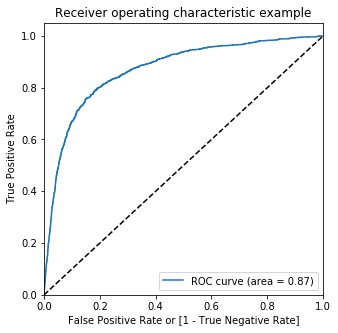

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, 
                                         drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is the probability where we get balanced sensitivity and specificity.

In [150]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.938851,63754,1,1,1,1,1,1,1,1,1,1,1
1,1,0.926550,17376,1,1,1,1,1,1,1,1,1,1,1
2,0,0.304340,95239,0,1,1,1,1,0,0,0,0,0,0
3,0,0.001478,30484,0,1,0,0,0,0,0,0,0,0,0
4,0,0.243838,42640,0,1,1,1,0,0,0,0,0,0,0


In [151]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500201  1.000000  0.000000
0.1   0.1  0.616830  0.973486  0.259886
0.2   0.2  0.695483  0.949272  0.441490
0.3   0.3  0.746922  0.911946  0.581765
0.4   0.4  0.780121  0.863116  0.697059
0.5   0.5  0.800604  0.806925  0.794278
0.6   0.6  0.797325  0.728935  0.865769
0.7   0.7  0.773562  0.631506  0.915731
0.8   0.8  0.708774  0.463162  0.954585
0.9   0.9  0.592693  0.201645  0.984056


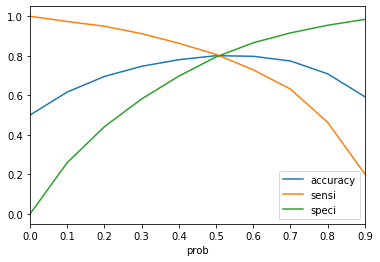

In [152]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take as a cutoff probability.

In [153]:
# Final Predicted values
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.938851,63754,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.926550,17376,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.304340,95239,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.001478,30484,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.243838,42640,0,1,1,1,0,0,0,0,0,0,0,0


In [154]:
# Let's check the overall accuracy of the final predicted values
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8006041426927503

In [155]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[13799,  3574],
       [ 3357, 14030]], dtype=int64)

#### Making predictions on the test set

In [156]:
# Filtering the test set based on the columns chosen
X_test = X_test[col]
X_test.head()

,Night_pck_user_No,onnet_mou_6,roam_ic_mou_7,roam_og_mou_8,total_og_mou_8,total_ic_mou_6,total_ic_mou_8,total_rech_num_7,total_rech_num_8,last_day_rch_amt_8,aon,vbc_3g_8,Total_rech_amt_all_6,Total_monthly_data_8,Total_sachet_data_8,Total_usage_7
21142,0,2.161018,-0.272791,-0.331556,-0.727508,2.438553,0.301700,0.237854,-1.055827,-0.594905,-0.692855,-0.301590,0.060395,-0.39865,-0.386335,1.784161
66547,1,-0.361873,-0.272791,-0.331556,-0.077880,0.437675,0.735075,0.825967,0.423446,-0.139507,-0.490479,-0.343456,1.102286,-0.39865,0.473942,0.711956
26487,0,0.671516,-0.272791,0.060335,0.349220,0.390584,-0.189830,1.218042,1.532902,-0.594905,-0.192003,-0.343456,-0.239174,-0.39865,-0.386335,-0.305933
65306,0,0.273705,-0.272791,-0.318385,0.666520,-0.696948,-0.090756,0.531911,1.902720,-0.212371,0.058989,-0.343456,-0.516403,-0.39865,-0.386335,-0.698879
65767,0,-0.476120,0.071165,-0.302392,-0.719413,-0.283464,-0.702146,0.629929,-0.069645,-0.594905,-0.752776,-0.343456,-0.381343,-0.39865,-0.386335,-0.608306


In [157]:
# Predicting
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

21142    0.969096
66547    0.398687
26487    0.633348
65306    0.222628
65767    0.852390
12697    0.731325
7372     0.803291
700      0.103102
59123    0.950307
97607    0.147680
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
21142,0.969096
66547,0.398687
26487,0.633348
65306,0.222628
65767,0.852390


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting index as CustID
y_test_df['CustID'] = y_test_df.index

In [160]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,1,21142,0.969096
1,0,66547,0.398687
2,1,26487,0.633348
3,1,65306,0.222628
4,0,65767,0.852390


In [162]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,1,21142,0.969096,1
1,0,66547,0.398687,0
2,1,26487,0.633348,1
3,1,65306,0.222628,0
4,0,65767,0.852390,1


In [163]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7990334273056786

In [164]:
print(classification_report(y_pred_final.Churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      7456
           1       0.79      0.81      0.80      7442

    accuracy                           0.80     14898
   macro avg       0.80      0.80      0.80     14898
weighted avg       0.80      0.80      0.80     14898



In [165]:
# Important features that we got
print(col)

Index(['Night_pck_user_No', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_8',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'aon',
       'vbc_3g_8', 'Total_rech_amt_all_6', 'Total_monthly_data_8',
       'Total_sachet_data_8', 'Total_usage_7'],
      dtype='object')


### 5. Recommendation strategies to manage customer churn 

In [166]:
# Extracting all selected important columns
telecom_imp = telecom_upsampled.filter(col,axis=1).columns
telecom_imp

Index(['Night_pck_user_No', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_8',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'aon',
       'vbc_3g_8', 'Total_rech_amt_all_6', 'Total_monthly_data_8',
       'Total_sachet_data_8', 'Total_usage_7'],
      dtype='object')

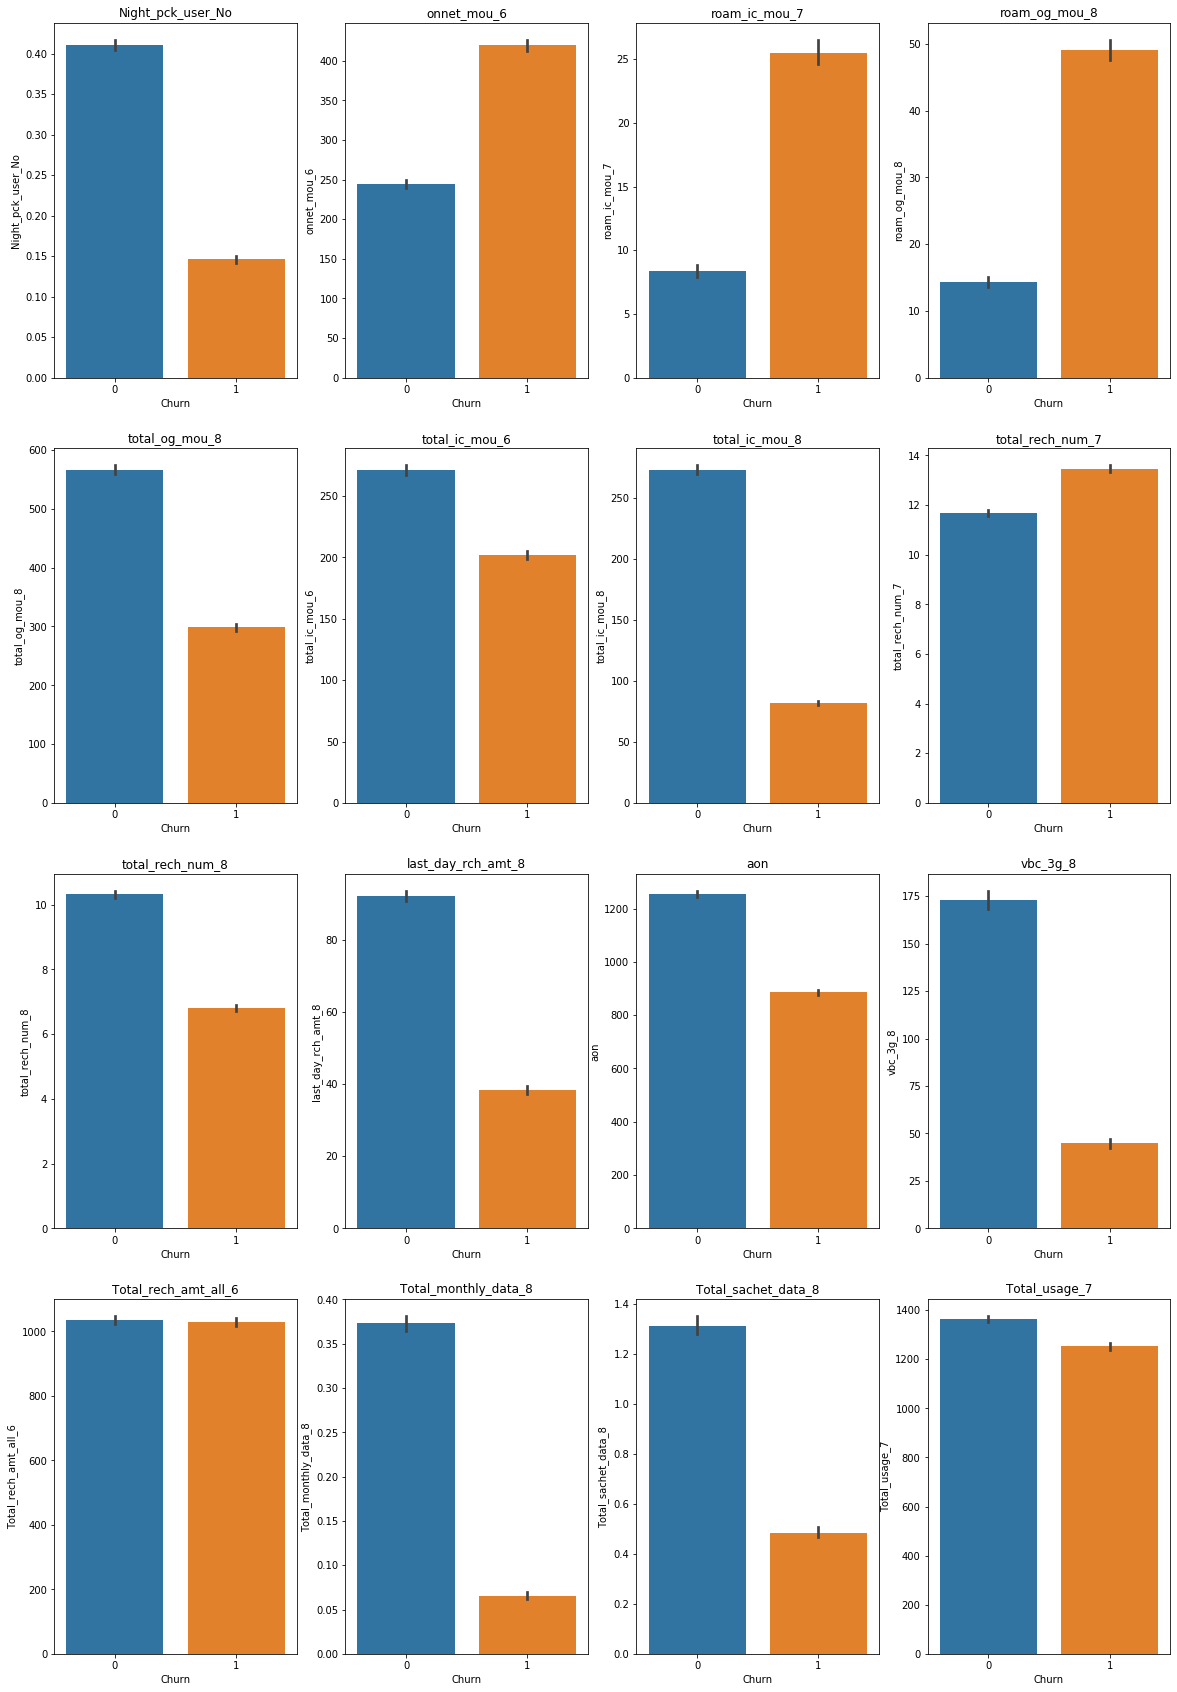

In [167]:
# Plotting plots of the important variables across Churn status

plt.figure(figsize=(20, 30))
        
for column in range(0,len(telecom_imp)):
    plt.subplot(4,4,column+1)
    sns.barplot(x='Churn', y=telecom_imp[column],data=telecom_upsampled)
    plt.title(telecom_imp[column])
    
plt.show()

From the above bar charts and the coefficients we have for the model, we derive below points-
- People who do not use night packs have churned less.
- People who have made more onnet or roaming(incoming and outgoing) calls have churned more.
- People who have not used much data or data sachet or have not made many outgoing or incoming calls in the third month(action phase) as compared to the first and second months(good phase) have churned.
- People with less number of recharges or less recharge amount for the third month when compared to the good phase have churned.
- People who are old users of the Operator churn less.

### Final Recommendations

- Check the Night pack price and quality, if it is comparable to other operators who might have better night pack offers.
- Check price and quality of Onnet, roaming calls. Introduce a good offer to cut the price, address any quality issues during roaming.
- Compare usage(data+calls) and recharge amounts of previous months with current month for the users. If the usage or recharge is less compared to previous months, check with the user and try to resolve any issues based on feedback. 
- Increase New user experience, get service feedback and provide loyalty offers.